In [1]:
%load_ext autoreload
%autoreload 2

import warnings
# For ignoring warnings printed by R magic commands
warnings.filterwarnings('ignore') 

%load_ext rpy2.ipython

In [2]:
%%R
# Load R libraries
require(stringr)
require(ggplot2)
require(data.table)
require(Hmisc)
require(ggthemes)
require(gridExtra)
require(grid)
require(lattice)
require(scales)
require(RColorBrewer)
library(tidyverse)
library(glue)
library(dplyr)

# Install the ggthemes package (you have to do it only once)
install.packages("ggthemes", repos = "http://cran.us.r-project.org")
install.packages("plotrix", repos = "http://cran.us.r-project.org")
# install.packages("wesanderson")
devtools::install_github("karthik/wesanderson")
library(ggthemes)
library(plotrix)
library(wesanderson)
library(gridExtra)

R[write to console]: Loading required package: stringr

R[write to console]: Loading required package: ggplot2



R[write to console]: Loading required package: data.table

R[write to console]: Loading required package: Hmisc

R[write to console]: Loading required package: lattice

R[write to console]: Loading required package: survival

R[write to console]: Loading required package: Formula

R[write to console]: 
Attaching package: ‘Hmisc’


R[write to console]: The following objects are masked from ‘package:base’:

    format.pval, units


R[write to console]: Loading required package: ggthemes

R[write to console]: Loading required package: gridExtra

R[write to console]: Loading required package: grid

R[write to console]: Loading required package: scales

R[write to console]: Loading required package: RColorBrewer

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

R[write to console]: ✔ tibble  3.0.0     ✔ purrr   0.3.3
✔ tidyr   1.0.2     ✔ dplyr   0.8.5
✔ readr   1.3.1     ✔ forcats 0.5.0

R[write to console]: ── Conflicts ───────────────

In [3]:
import os
import random

import pandas as pd

# Microbenchmark Plots

## Load Top-Level Dataframes

In [5]:
# load top-level dataframes
top_level_path = "csv/top-level-dataframes"

cic_iomt_2024_df = pd.read_csv(os.path.join(top_level_path, "cic_iomt_2024_df.csv"))
cic_iot_2023_df = pd.read_csv(os.path.join(top_level_path, "cic_iot_2023_df.csv"))
iscxvpn2016_df = pd.read_csv(os.path.join(top_level_path, "iscxvpn2016_df.csv"))
ucsbfinetuning_df = pd.read_csv(os.path.join(top_level_path, "ucsbfinetuning_df.csv"))
cic_iot_2023_32_df = pd.read_csv(os.path.join(top_level_path, "cic_iot_2023_32_df.csv"))
cic_ids_2017_df = pd.read_csv(os.path.join(top_level_path, "cic_ids_2017_df.csv"))
cic_ids_2018_df = pd.read_csv(os.path.join(top_level_path, "cic_ids_2018_df.csv"))

## Load E2E Dataframes

In [6]:
e2e_pareto_path = "csv/e2e-pareto-dataframes"

pareto_cic_iomt_2024_df = pd.read_csv(os.path.join(e2e_pareto_path, "pareto_cic_iomt_2024_df.csv"))
pareto_cic_iot_2023_df = pd.read_csv(os.path.join(e2e_pareto_path, "pareto_cic_iot_2023_df.csv"))
pareto_iscxvpn2016_df = pd.read_csv(os.path.join(e2e_pareto_path, "pareto_iscxvpn2016_df.csv"))
pareto_ucsbfinetuning_df = pd.read_csv(os.path.join(e2e_pareto_path, "pareto_ucsbfinetuning_df.csv"))
pareto_cic_iot_2023_32_df = pd.read_csv(os.path.join(e2e_pareto_path, "pareto_cic_iot_2023_32_df.csv"))
pareto_cic_ids_2017_df = pd.read_csv(os.path.join(e2e_pareto_path, "pareto_cic_ids_2017_df.csv"))
pareto_cic_ids_2018_df = pd.read_csv(os.path.join(e2e_pareto_path, "pareto_cic_ids_2018_df.csv"))

## Depths

In [7]:
bm_depth_path = "csv/bm-depth"

bm_pareto_cic_iomt_2024_depth = pd.read_csv(os.path.join(bm_depth_path, "bm_pareto_cic_iomt_2024_depth.csv"))
bm_pareto_cic_iot_2023_depth = pd.read_csv(os.path.join(bm_depth_path, "bm_pareto_cic_iot_2023_depth.csv"))
bm_pareto_iscxvpn2016_depth = pd.read_csv(os.path.join(bm_depth_path, "bm_pareto_iscxvpn2016_depth.csv"))
bm_pareto_ucsbfinetuning_depth = pd.read_csv(os.path.join(bm_depth_path, "bm_pareto_ucsbfinetuning_depth.csv"))
bm_pareto_cic_iot_2023_32_depth = pd.read_csv(os.path.join(bm_depth_path, "bm_pareto_cic_iot_2023_32_depth.csv"))
bm_pareto_cic_ids_2017_depth = pd.read_csv(os.path.join(bm_depth_path, "bm_pareto_cic_ids_2017_depth.csv"))
bm_pareto_cic_ids_2018_depth = pd.read_csv(os.path.join(bm_depth_path, "bm_pareto_cic_ids_2018_depth.csv"))

In [8]:
%%R
create_bm_pareto_plot <- function(
    bm_pareto_df, 
    bm_parameter,
    bm_parameter_values_order,
    bm_parameter_legend_labels=bm_parameter_values_order,
    line_size=1,
    point_size=2,
    x_label="#Flows", 
    y_label="F1 Score",
    y_title=element_blank(),
    tag, 
    tag_element=element_text(
                colour="black", size=18, angle=0,
                margin=margin(t=-10, r=0, b=0, l=0, unit="pt"),
                vjust=2.0
    ),
    top_margin=0.6,
    # x_breaks=seq(from=0, to=1000000, length.out=4),
    x_breaks=c(100000, 500000, 1000000),
    x_limits=c(0, 1000000),
    y_breaks,
    y_limits,
    legend_position="none",
    legend_guide=guides(fill=guide_legend(ncol=1, bycol=TRUE, title=NULL), linetype=FALSE)
    ) {

    blues <- brewer.pal(n = 9, "Blues")[5:9]
    bm_color_palette <- c(blues[2], blues[3], blues[4])
    
    # convert bm_parameter to factor
    bm_pareto_df[[bm_parameter]] <- factor(bm_pareto_df[[bm_parameter]], levels=bm_parameter_values_order)

    bm_pareto_plot <- ggplot(
        bm_pareto_df, aes_string(x="num_flows", y="f1_score", color=bm_parameter)) +
        geom_line(size=line_size) +
        geom_point(size=point_size) +
        labs(x = x_label, y = y_label, tag = tag) +
        scale_x_continuous(breaks=x_breaks, labels = label_number_si()) +
        scale_y_continuous(breaks=y_breaks, labels = scales::number_format(accuracy = 0.01)) +
        coord_cartesian(xlim = x_limits, ylim = y_limits) +
        theme_hc(base_size = 22) +
        theme(
            axis.ticks = element_line(color = "black"), # Ensure ticks are visible
            axis.ticks.length = unit(0.15, "cm"), # Adjust the length of the ticks as needed
            plot.title = element_text(hjust = 0.5),
            axis.text.x=element_text(colour="black", size=16),
            axis.text.y=element_text(colour="black", size=16),
            axis.title.x=element_text(colour="black", size=18),
            axis.title.y=y_title,
            plot.tag=tag_element,
            plot.tag.position = "top",
            plot.margin = margin(top_margin, 0.25, 0.1, 0.25, "cm"),
            legend.margin = margin(t = -10.5, r = 0, b = 0, l = 0, unit = "pt"),
            # Adjust the size of the legend keys (boxes)
            legend.key.width = unit(0.4, "lines"),
            legend.key.height = unit(0.4, "lines"),
            legend.spacing.x = unit(0.05, "cm"),
            legend.spacing.y = unit(0.05, "cm"),
            legend.text=element_text(colour="black", size=16),
            legend.title = element_blank(), 
            legend.position = legend_position, 
            legend.justification = c(0, 1)
            ) +
        legend_guide +
        scale_color_manual(values = bm_color_palette, labels = bm_parameter_legend_labels)
                                
    return (bm_pareto_plot)
}

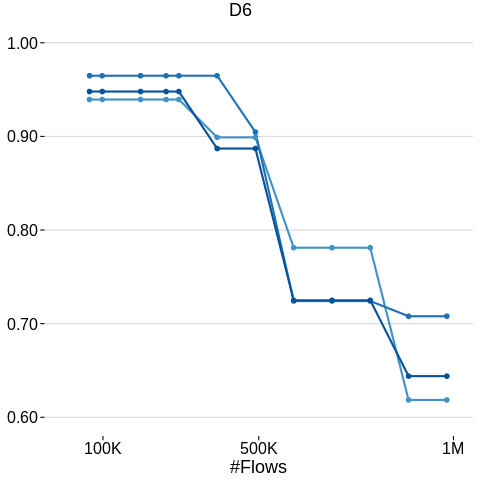

In [9]:
%%R -i bm_pareto_cic_ids_2017_depth
bm_pareto_cic_ids_2017_depth_plot <- create_bm_pareto_plot(
    bm_pareto_cic_ids_2017_depth, 
    bm_parameter="max_depth",
    bm_parameter_values_order=c(10, 20, 30),
    # bm_parameter_legend_labels=c("D=10", "D=20", "D=30", "D=40"),
    tag="D6", 
    y_breaks=seq(from=0.6, to=1.0, length.out=5),
    y_limits=c(0.6, 1.0)
)

bm_pareto_cic_ids_2017_depth_plot

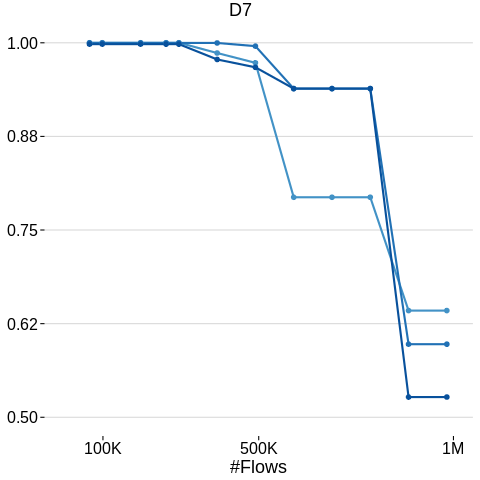

In [10]:
%%R -i bm_pareto_cic_ids_2018_depth
bm_pareto_cic_ids_2018_depth_plot <- create_bm_pareto_plot(
    bm_pareto_cic_ids_2018_depth, 
    bm_parameter="max_depth",
    bm_parameter_values_order=c(10, 20, 30),
    tag="D7", 
    y_breaks=seq(from=0.5, to=1.00, length.out=5),
    y_limits=c(0.5, 1.00)
)

bm_pareto_cic_ids_2018_depth_plot

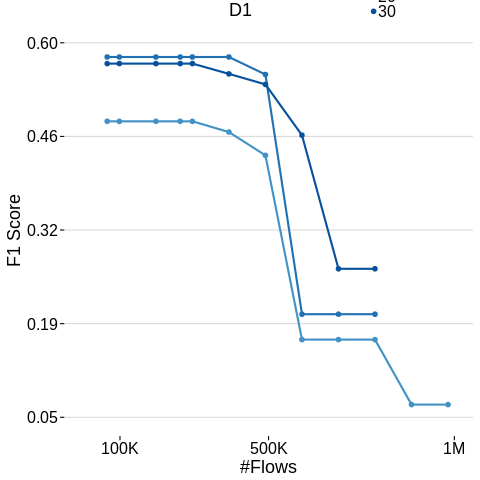

In [11]:
%%R -i bm_pareto_cic_iomt_2024_depth
bm_pareto_cic_iomt_2024_depth_plot <- create_bm_pareto_plot(
    bm_pareto_cic_iomt_2024_depth, 
    bm_parameter="max_depth",
    bm_parameter_values_order=c(10, 20, 30),
    tag="D1", 
    y_title=element_text(colour="black", size=18),
    y_breaks=seq(from=0.05, to=0.6, length.out=5),
    y_limits=c(0.05, 0.6),
    legend_position=c(0.75, 1.10)
)

bm_pareto_cic_iomt_2024_depth_plot

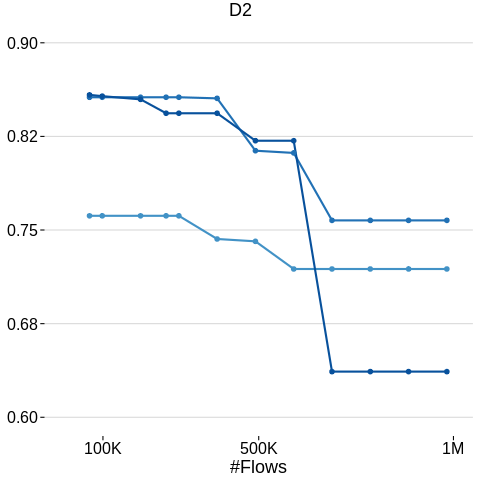

In [12]:
%%R -i bm_pareto_cic_iot_2023_depth
bm_pareto_cic_iot_2023_depth_plot <- create_bm_pareto_plot(
    bm_pareto_cic_iot_2023_depth, 
    bm_parameter="max_depth",
    bm_parameter_values_order=c(10, 20, 30),
    tag="D2", 
    y_breaks=seq(from=0.60, to=0.9, length.out=5),
    y_limits=c(0.60, 0.9)
)

bm_pareto_cic_iot_2023_depth_plot

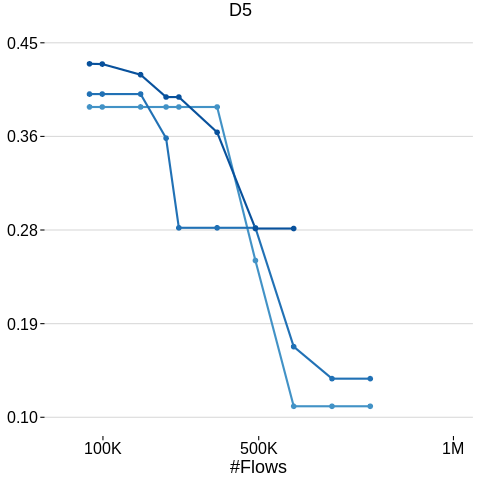

In [13]:
%%R -i bm_pareto_cic_iot_2023_32_depth
bm_pareto_cic_iot_2023_32_depth_plot <- create_bm_pareto_plot(
    bm_pareto_cic_iot_2023_32_depth, 
    bm_parameter="max_depth",
    bm_parameter_values_order=c(10, 20, 30),
    tag="D5", 
    y_breaks=seq(from=0.10, to=0.45, length.out=5),
    y_limits=c(0.10, 0.45)
)

bm_pareto_cic_iot_2023_32_depth_plot

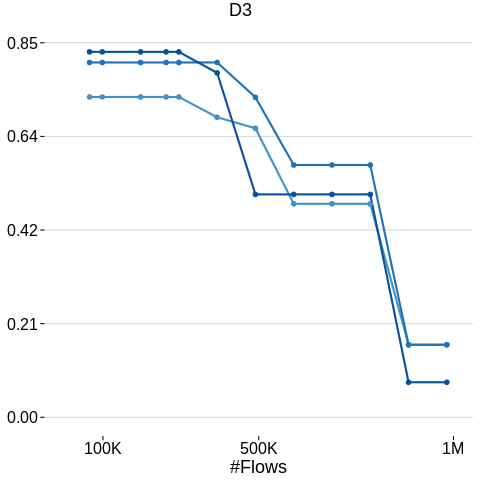

In [14]:
%%R -i bm_pareto_iscxvpn2016_depth
bm_pareto_iscxvpn2016_depth_plot <- create_bm_pareto_plot(
    bm_pareto_iscxvpn2016_depth, 
    bm_parameter="max_depth",
    bm_parameter_values_order=c(10, 20, 30),
    tag="D3", 
    y_breaks=seq(from=0.0, to=0.85, length.out=5),
    y_limits=c(0.0, 0.85)
)

bm_pareto_iscxvpn2016_depth_plot

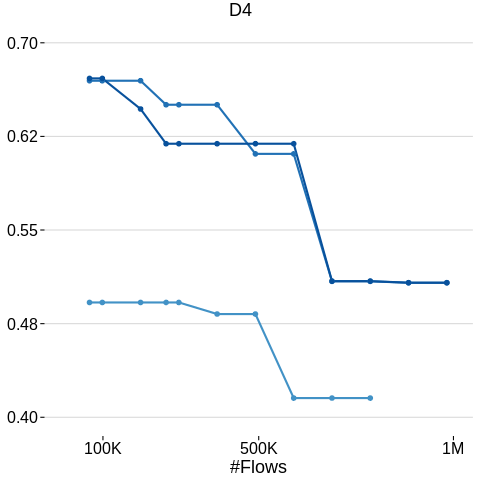

In [15]:
%%R -i bm_pareto_ucsbfinetuning_depth
bm_pareto_ucsbfinetuning_depth_plot <- create_bm_pareto_plot(
    bm_pareto_ucsbfinetuning_depth, 
    bm_parameter="max_depth",
    bm_parameter_values_order=c(10, 20, 30),
    tag="D4", 
    y_breaks=seq(from=0.4, to=0.7, length.out=5),
    y_limits=c(0.4, 0.7)
)

bm_pareto_ucsbfinetuning_depth_plot

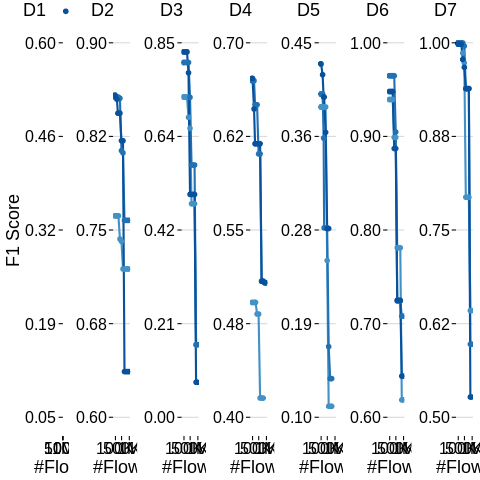

In [16]:
%%R
# save the ggplot with a tight layout around all the components
bm_depth_combined_pareto_plots <- grid.arrange(
    bm_pareto_cic_iomt_2024_depth_plot,
    bm_pareto_cic_iot_2023_depth_plot,
    bm_pareto_iscxvpn2016_depth_plot,
    bm_pareto_ucsbfinetuning_depth_plot,
    bm_pareto_cic_iot_2023_32_depth_plot,
    bm_pareto_cic_ids_2017_depth_plot,
    bm_pareto_cic_ids_2018_depth_plot,
    nrow=1
)
ggsave(
    bm_depth_combined_pareto_plots, 
    width=17.8, height=2.5, # 18.0, 2.5
    file="/home/jovyan/work/plots/generated/bm-depth-pareto.pdf"
)

## Number of Partitions

In [17]:
bm_partitions_path = "csv/bm-partitions"

bm_pareto_cic_iomt_2024_num_partitions = pd.read_csv(os.path.join(bm_partitions_path, "bm_pareto_cic_iomt_2024_num_partitions.csv"))
bm_pareto_cic_iot_2023_num_partitions = pd.read_csv(os.path.join(bm_partitions_path, "bm_pareto_cic_iot_2023_num_partitions.csv"))
bm_pareto_iscxvpn2016_num_partitions = pd.read_csv(os.path.join(bm_partitions_path, "bm_pareto_iscxvpn2016_num_partitions.csv"))
bm_pareto_ucsbfinetuning_num_partitions = pd.read_csv(os.path.join(bm_partitions_path, "bm_pareto_ucsbfinetuning_num_partitions.csv"))
bm_pareto_cic_iot_2023_32_num_partitions = pd.read_csv(os.path.join(bm_partitions_path, "bm_pareto_cic_iot_2023_32_num_partitions.csv"))
bm_pareto_cic_ids_2017_num_partitions = pd.read_csv(os.path.join(bm_partitions_path, "bm_pareto_cic_ids_2017_num_partitions.csv"))
bm_pareto_cic_ids_2018_num_partitions = pd.read_csv(os.path.join(bm_partitions_path, "bm_pareto_cic_ids_2018_num_partitions.csv"))

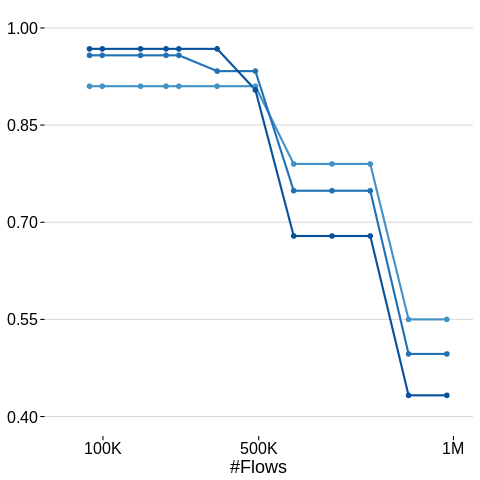

In [18]:
%%R -i bm_pareto_cic_ids_2017_num_partitions
bm_pareto_cic_ids_2017_num_partitions_plot <- create_bm_pareto_plot(
    bm_pareto_cic_ids_2017_num_partitions, 
    bm_parameter="num_partitions",
    bm_parameter_values_order=c(1, 3, 5),
    # bm_parameter_legend_labels=c("P=1", "P=2", "P=3", "P=4", "P=5"),
    tag="D6", 
    tag_element=element_blank(),
    top_margin=0.3,
    y_breaks=seq(from=0.4, to=1.0, length.out=5),
    y_limits=c(0.4, 1.0)
)

bm_pareto_cic_ids_2017_num_partitions_plot

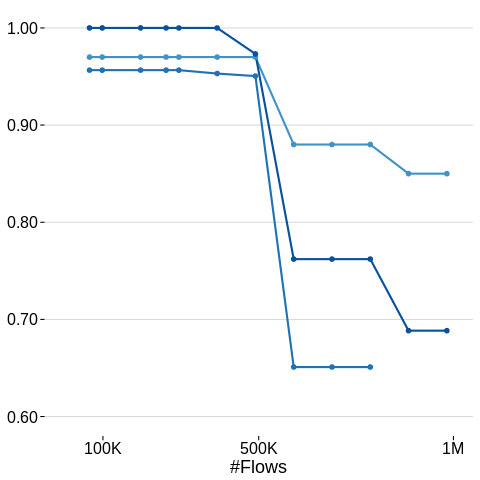

In [19]:
%%R -i bm_pareto_cic_ids_2018_num_partitions
bm_pareto_cic_ids_2018_num_partitions_plot <- create_bm_pareto_plot(
    bm_pareto_cic_ids_2018_num_partitions, 
    bm_parameter="num_partitions",
    bm_parameter_values_order=c(1, 3, 5),
    tag="D7", 
    tag_element=element_blank(),
    top_margin=0.3,
    y_breaks=seq(from=0.6, to=1.00, length.out=5),
    y_limits=c(0.6, 1.00)
)

bm_pareto_cic_ids_2018_num_partitions_plot

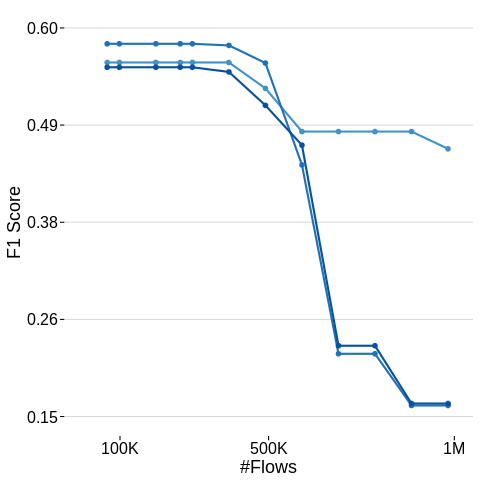

In [20]:
%%R -i bm_pareto_cic_iomt_2024_num_partitions
bm_pareto_cic_iomt_2024_num_partitions_plot <- create_bm_pareto_plot(
    bm_pareto_cic_iomt_2024_num_partitions, 
    bm_parameter="num_partitions",
    bm_parameter_values_order=c(1, 3, 5),
    tag="D1", 
    tag_element=element_blank(),
    top_margin=0.3,
    y_title=element_text(colour="black", size=18),
    y_breaks=seq(from=0.15, to=0.6, length.out=5),
    y_limits=c(0.15, 0.6),
    legend_position=c(0.60, 1.05),
    legend_guide=guides(color=guide_legend(nrow=1, byrow=TRUE, title=NULL), linetype=FALSE)
)

bm_pareto_cic_iomt_2024_num_partitions_plot

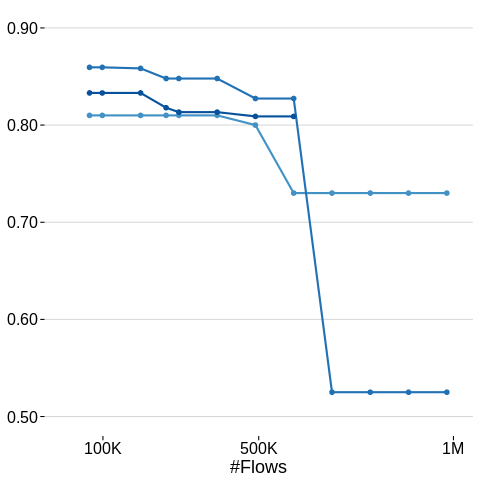

In [21]:
%%R -i bm_pareto_cic_iot_2023_num_partitions
bm_pareto_cic_iot_2023_num_partitions_plot <- create_bm_pareto_plot(
    bm_pareto_cic_iot_2023_num_partitions, 
    bm_parameter="num_partitions",
    bm_parameter_values_order=c(1, 3, 5),
    tag="D2", 
    tag_element=element_blank(),
    top_margin=0.3,
    y_breaks=seq(from=0.50, to=0.9, length.out=5),
    y_limits=c(0.50, 0.9)
)

bm_pareto_cic_iot_2023_num_partitions_plot

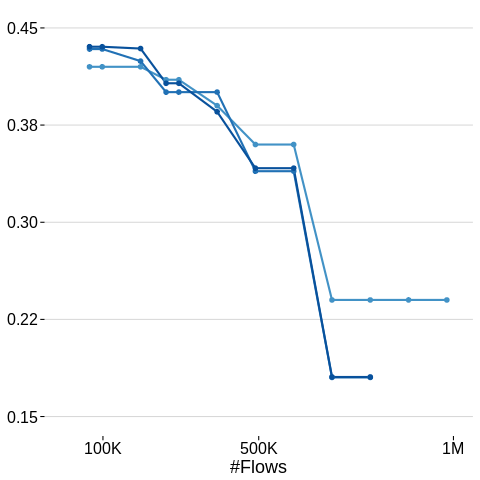

In [22]:
%%R -i bm_pareto_cic_iot_2023_32_num_partitions
bm_pareto_cic_iot_2023_32_num_partitions_plot <- create_bm_pareto_plot(
    bm_pareto_cic_iot_2023_32_num_partitions, 
    bm_parameter="num_partitions",
    bm_parameter_values_order=c(1, 3, 5),
    tag="D5", 
    tag_element=element_blank(),
    top_margin=0.3,
    y_breaks=seq(from=0.15, to=0.45, length.out=5),
    y_limits=c(0.15, 0.45)
)

bm_pareto_cic_iot_2023_32_num_partitions_plot

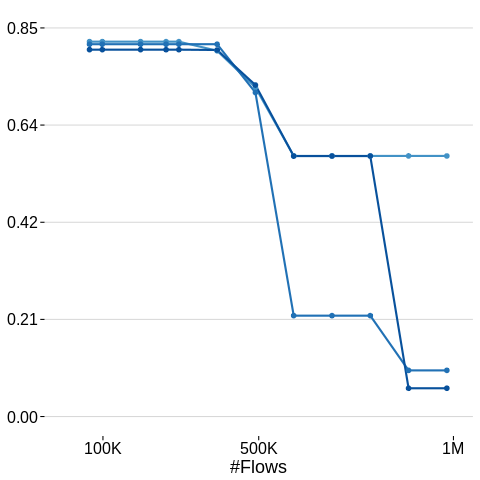

In [23]:
%%R -i bm_pareto_iscxvpn2016_num_partitions
bm_pareto_iscxvpn2016_num_partitions_plot <- create_bm_pareto_plot(
    bm_pareto_iscxvpn2016_num_partitions, 
    bm_parameter="num_partitions",
    bm_parameter_values_order=c(1, 3, 5),
    tag="D3",
    tag_element=element_blank(), 
    top_margin=0.3,
    y_breaks=seq(from=0.0, to=0.85, length.out=5),
    y_limits=c(0.0, 0.85)
)

bm_pareto_iscxvpn2016_num_partitions_plot

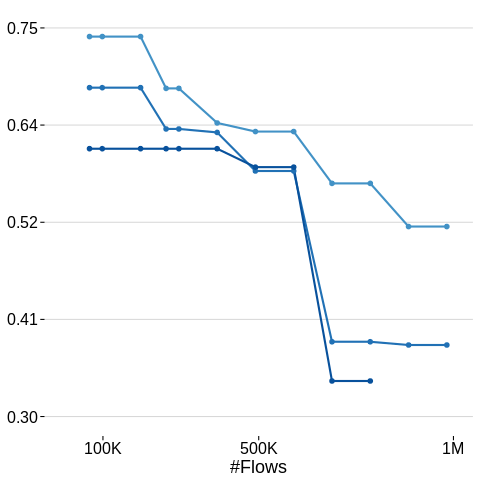

In [24]:
%%R -i bm_pareto_ucsbfinetuning_num_partitions
bm_pareto_ucsbfinetuning_num_partitions_plot <- create_bm_pareto_plot(
    bm_pareto_ucsbfinetuning_num_partitions, 
    bm_parameter="num_partitions",
    bm_parameter_values_order=c(1, 3, 5),
    tag="D4", 
    tag_element=element_blank(),
    top_margin=0.3,
    y_breaks=seq(from=0.30, to=0.75, length.out=5),
    y_limits=c(0.30, 0.75)
)

bm_pareto_ucsbfinetuning_num_partitions_plot

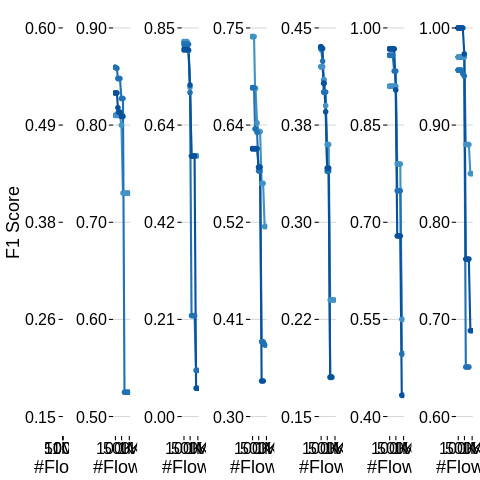

In [25]:
%%R
# save the ggplot with a tight layout around all the components
bm_num_partitions_combined_pareto_plots <- grid.arrange(
    bm_pareto_cic_iomt_2024_num_partitions_plot,
    bm_pareto_cic_iot_2023_num_partitions_plot,
    bm_pareto_iscxvpn2016_num_partitions_plot,
    bm_pareto_ucsbfinetuning_num_partitions_plot,
    bm_pareto_cic_iot_2023_32_num_partitions_plot,
    bm_pareto_cic_ids_2017_num_partitions_plot,
    bm_pareto_cic_ids_2018_num_partitions_plot,
    nrow=1
)
ggsave(
    bm_num_partitions_combined_pareto_plots, 
    width=17.8, height=2.5, # 18.0, 2.5
    file="/home/jovyan/work/plots/generated/bm-num-partitions-pareto.pdf"
)

## Features per partitions

In [26]:
bm_features_path = "csv/bm-features"

bm_pareto_cic_iomt_2024_feature_limit = pd.read_csv(os.path.join(bm_features_path, "bm_pareto_cic_iomt_2024_feature_limit.csv"))
bm_pareto_cic_iot_2023_feature_limit = pd.read_csv(os.path.join(bm_features_path, "bm_pareto_cic_iot_2023_feature_limit.csv"))
bm_pareto_iscxvpn2016_feature_limit = pd.read_csv(os.path.join(bm_features_path, "bm_pareto_iscxvpn2016_feature_limit.csv"))
bm_pareto_ucsbfinetuning_feature_limit = pd.read_csv(os.path.join(bm_features_path, "bm_pareto_ucsbfinetuning_feature_limit.csv"))
bm_pareto_cic_iot_2023_32_feature_limit = pd.read_csv(os.path.join(bm_features_path, "bm_pareto_cic_iot_2023_32_feature_limit.csv"))
bm_pareto_cic_ids_2017_feature_limit = pd.read_csv(os.path.join(bm_features_path, "bm_pareto_cic_ids_2017_feature_limit.csv"))
bm_pareto_cic_ids_2018_feature_limit = pd.read_csv(os.path.join(bm_features_path, "bm_pareto_cic_ids_2018_feature_limit.csv"))

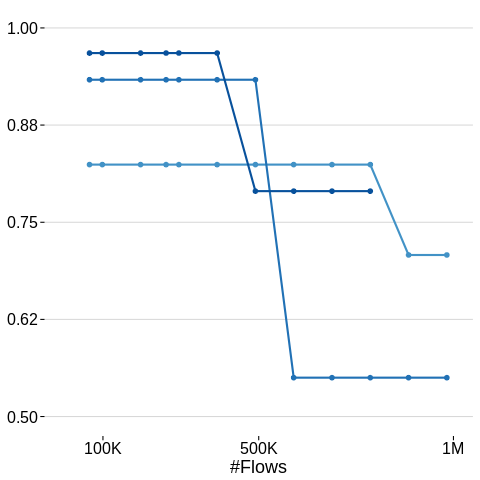

In [27]:
%%R -i bm_pareto_cic_ids_2017_feature_limit
bm_pareto_cic_ids_2017_feature_limit_plot <- create_bm_pareto_plot(
    bm_pareto_cic_ids_2017_feature_limit, 
    bm_parameter="feature_limit",
    bm_parameter_values_order=c(1, 2, 3),
    # bm_parameter_legend_labels=c("F=1", "F=2", "F=3", "F=4", "F=5"),
    tag="D6", 
    tag_element=element_blank(),
    top_margin=0.3,
    y_breaks=seq(from=0.5, to=1.0, length.out=5),
    y_limits=c(0.5, 1.0)
)

bm_pareto_cic_ids_2017_feature_limit_plot

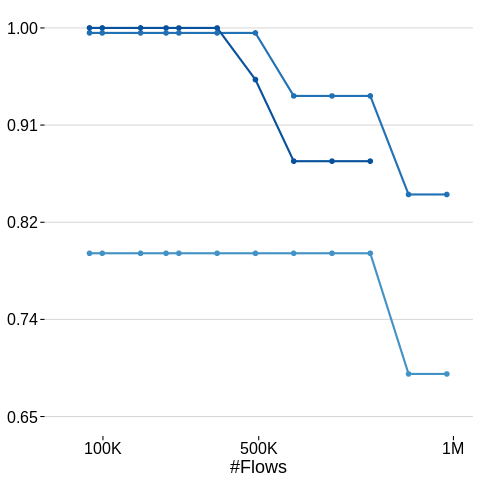

In [28]:
%%R -i bm_pareto_cic_ids_2018_feature_limit
bm_pareto_cic_ids_2018_feature_limit_plot <- create_bm_pareto_plot(
    bm_pareto_cic_ids_2018_feature_limit, 
    bm_parameter="feature_limit",
    bm_parameter_values_order=c(1, 2, 3),
    tag="D7", 
    tag_element=element_blank(),
    top_margin=0.3,
    y_breaks=seq(from=0.65, to=1.00, length.out=5),
    y_limits=c(0.65, 1.00)
)

bm_pareto_cic_ids_2018_feature_limit_plot

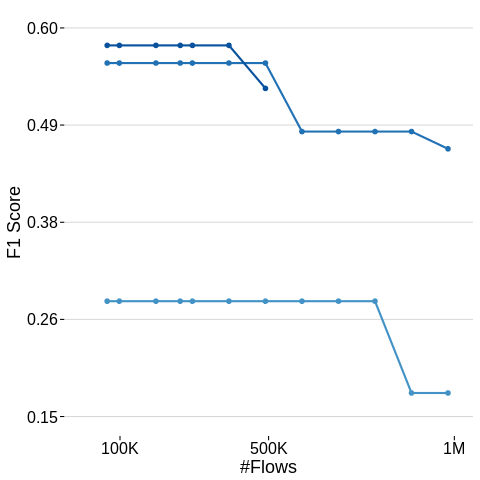

In [29]:
%%R -i bm_pareto_cic_iomt_2024_feature_limit
bm_pareto_cic_iomt_2024_feature_limit_plot <- create_bm_pareto_plot(
    bm_pareto_cic_iomt_2024_feature_limit, 
    bm_parameter="feature_limit",
    bm_parameter_values_order=c(1, 2, 3),
    tag="D1", 
    tag_element=element_blank(),
    top_margin=0.3,
    y_title=element_text(colour="black", size=18),
    y_breaks=seq(from=0.15, to=0.6, length.out=5),
    y_limits=c(0.15, 0.6),
    legend_position=c(0.60, 1.05),
    legend_guide=guides(color=guide_legend(nrow=1, byrow=TRUE, title=NULL), linetype=FALSE)
)

bm_pareto_cic_iomt_2024_feature_limit_plot

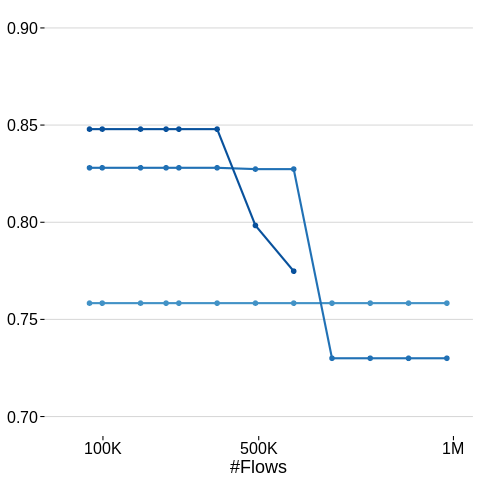

In [30]:
%%R -i bm_pareto_cic_iot_2023_feature_limit
bm_pareto_cic_iot_2023_feature_limit_plot <- create_bm_pareto_plot(
    bm_pareto_cic_iot_2023_feature_limit, 
    bm_parameter="feature_limit",
    bm_parameter_values_order=c(1, 2, 3),
    tag="D2", 
    tag_element=element_blank(),
    top_margin=0.3,
    y_breaks=seq(from=0.70, to=0.9, length.out=5),
    y_limits=c(0.70, 0.9)
)

bm_pareto_cic_iot_2023_feature_limit_plot

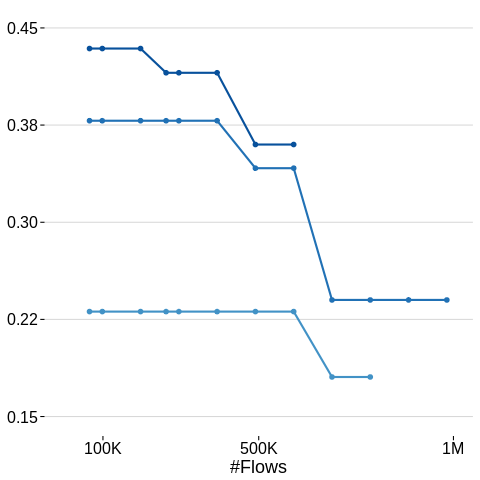

In [31]:
%%R -i bm_pareto_cic_iot_2023_32_feature_limit
bm_pareto_cic_iot_2023_32_feature_limit_plot <- create_bm_pareto_plot(
    bm_pareto_cic_iot_2023_32_feature_limit, 
    bm_parameter="feature_limit",
    bm_parameter_values_order=c(1, 2, 3),
    tag="D5", 
    tag_element=element_blank(),
    top_margin=0.3,
    y_breaks=seq(from=0.15, to=0.45, length.out=5),
    y_limits=c(0.15, 0.45)
)

bm_pareto_cic_iot_2023_32_feature_limit_plot

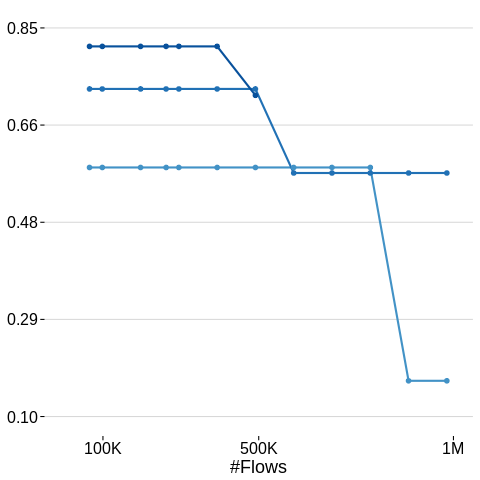

In [32]:
%%R -i bm_pareto_iscxvpn2016_feature_limit
bm_pareto_iscxvpn2016_feature_limit_plot <- create_bm_pareto_plot(
    bm_pareto_iscxvpn2016_feature_limit, 
    bm_parameter="feature_limit",
    bm_parameter_values_order=c(1, 2, 3),
    tag="D3", 
    tag_element=element_blank(),
    top_margin=0.3,
    y_breaks=seq(from=0.1, to=0.85, length.out=5),
    y_limits=c(0.1, 0.85)
)

bm_pareto_iscxvpn2016_feature_limit_plot

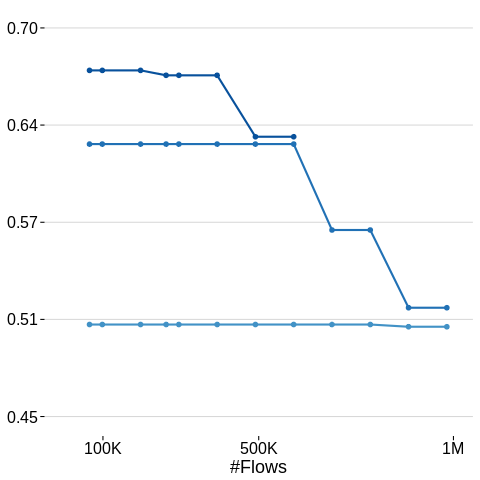

In [33]:
%%R -i bm_pareto_ucsbfinetuning_feature_limit
bm_pareto_ucsbfinetuning_feature_limit_plot <- create_bm_pareto_plot(
    bm_pareto_ucsbfinetuning_feature_limit, 
    bm_parameter="feature_limit",
    bm_parameter_values_order=c(1, 2, 3),
    tag="D4", 
    tag_element=element_blank(),
    top_margin=0.3,
    y_breaks=seq(from=0.45, to=0.70, length.out=5),
    y_limits=c(0.45, 0.70)
)

bm_pareto_ucsbfinetuning_feature_limit_plot

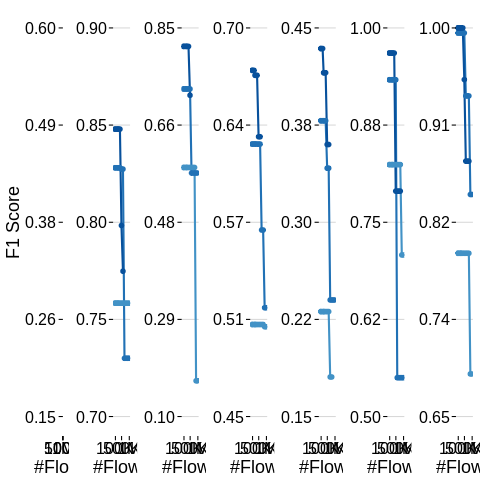

In [34]:
%%R
# save the ggplot with a tight layout around all the components
bm_feature_limit_combined_pareto_plots <- grid.arrange(
    bm_pareto_cic_iomt_2024_feature_limit_plot,
    bm_pareto_cic_iot_2023_feature_limit_plot,
    bm_pareto_iscxvpn2016_feature_limit_plot,
    bm_pareto_ucsbfinetuning_feature_limit_plot,
    bm_pareto_cic_iot_2023_32_feature_limit_plot,
    bm_pareto_cic_ids_2017_feature_limit_plot,
    bm_pareto_cic_ids_2018_feature_limit_plot,
    nrow=1
)
ggsave(
    bm_feature_limit_combined_pareto_plots, 
    width=17.8, height=2.5, # 18.0, 2.5
    file="/home/jovyan/work/plots/generated/bm-feature-limit-pareto.pdf"
)

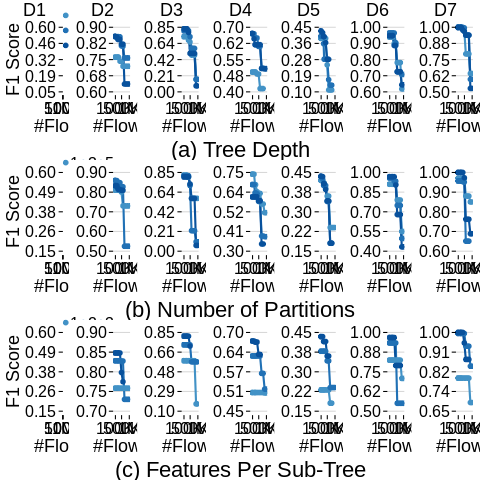

In [35]:
%%R
# Define a spacer with controlled height
# Create a spacer with default ggplot font and custom text size
depth_tag <- grid::textGrob(
    "(a) Tree Depth",  # Empty text
    gp = gpar( # Graphical parameters
        fontsize = 22, # Match ggplot2 default size (adjustable)
        fontfamily = theme_get()$text$family, # Use ggplot2 default font
        col = theme_get()$text$colour # Use ggplot2 default text color
    )
)
# Create a spacer with default ggplot font and custom text size
num_partitions_tag <- grid::textGrob(
    "(b) Number of Partitions",  # Empty text
    gp = gpar( # Graphical parameters
        fontsize = 22, # Match ggplot2 default size (adjustable)
        fontfamily = theme_get()$text$family, # Use ggplot2 default font
        col = theme_get()$text$colour # Use ggplot2 default text color
    )
)
# Create a spacer with default ggplot font and custom text size
feature_limit_tag <- grid::textGrob(
    "(c) Features Per Sub-Tree",  # Empty text
    gp = gpar( # Graphical parameters
        fontsize = 22, # Match ggplot2 default size (adjustable)
        fontfamily = theme_get()$text$family, # Use ggplot2 default font
        col = theme_get()$text$colour # Use ggplot2 default text color
    )
)

spacer_height <- unit(0.15, "cm") # Set spacer height to 0.5 cm

# save the ggplot with a tight layout around all the components
benchmarks_combined_pareto_plots <- grid.arrange(
    bm_depth_combined_pareto_plots,
    depth_tag,
    bm_num_partitions_combined_pareto_plots,
    num_partitions_tag,
    bm_feature_limit_combined_pareto_plots,
    feature_limit_tag,
    nrow=6,
    heights = c(1, spacer_height, 1, spacer_height, 1, spacer_height) # Control heights
)
ggsave(
    benchmarks_combined_pareto_plots, 
    width=17.8, height=7.5, # 18.0, 7.5
    file="/home/jovyan/work/plots/generated/benchmarks-pareto.pdf"
)

## Register Size vs Number of Features Per Sub-Tree

In [36]:
bm_reg_size_path = "csv/bm-register-size"

reg_size_df = pd.read_csv(os.path.join(bm_reg_size_path, "reg_size_df.csv"))
# melt the dataframe
reg_size_melt_df = pd.melt(
    reg_size_df, 
    id_vars=['total_features'], 
    var_name='model', 
    value_name='reg_size'
)

reg_size_melt_df

,total_features,model,reg_size
0,0,cap_fl_1,0
1,1,cap_fl_1,1
2,2,cap_fl_1,1
3,3,cap_fl_1,1
4,4,cap_fl_1,1
...,...,...,...
80,12,netbeacon,12
81,13,netbeacon,13
82,14,netbeacon,14
83,15,netbeacon,15


In [37]:
%%R
create_reg_size_plot <- function(
    reg_size_df, 
    line_size=1,
    point_size=1.5,
    x_label="#Features", 
    y_label="Reg. Bits",
    x_breaks=seq(from=0, to=50, length.out=5),
    y_breaks,
    y_limits,
    x_labels=label_number_si(),
    y_labels=label_number_si(),
    legend_position="none"
    ) {

    # reg_size_color_palette <- brewer.pal(n = 9, "Dark2")[2:9]
    blues <- brewer.pal(n = 8, "PuBu")
    reg_size_color_palette <- c(blues[5], blues[6], blues[7], blues[8], 'firebrick2')

    models_order <- c("cap_fl_1", "cap_fl_2", "cap_fl_3", "cap_fl_4", "netbeacon")
    reg_size_df$model <- factor(reg_size_df$model, levels=models_order)
    new_legend_labels <- c('SpliDT:1', 'SpliDT:2', 'SpliDT:3', 'SpliDT:4', 'NB/Leo')

    reg_size_plot <- ggplot(
        reg_size_df, 
        aes_string(x="total_features", y="reg_size", color="model")
        ) +
        geom_line(size=line_size) +
        geom_point(size=point_size) +
        labs(x = x_label, y = y_label) +
        scale_x_continuous(
            breaks=x_breaks, 
            labels = x_labels
        ) +
        scale_y_continuous(
            breaks=y_breaks, 
            labels = y_labels
        ) +
        coord_cartesian(ylim = y_limits) +
        theme_hc(base_size = 22) +
        theme(
            axis.ticks = element_line(color = "black"), # Ensure ticks are visible
            axis.ticks.length = unit(0.15, "cm"), # Adjust the length of the ticks as needed
            plot.title = element_text(hjust = 0.5),
            axis.text.x=element_text(colour="black", size=11),
            axis.text.y=element_text(colour="black", size=11),
            axis.title.x=element_text(colour="black", size=12),
            axis.title.y=element_text(colour="black", size=12),
            plot.tag=element_text(
                colour="black", size=12, angle=0,
                margin=margin(t=-10, r=0, b=0, l=0, unit="pt"),
                vjust=2.0
            ),
            plot.tag.position = "top",
            plot.margin = margin(0.6, 0.25, 0.1, 0.25, "cm"),
            legend.margin = margin(t = -10.5, r = 0, b = 0, l = 0, unit = "pt"),
            # Adjust the size of the legend keys (boxes)
            legend.key.width = unit(0.6, "lines"),
            legend.key.height = unit(0.6, "lines"),
            legend.spacing.x = unit(0.08, "cm"),
            legend.spacing.y = unit(0.08, "cm"),
            legend.text=element_text(colour="black", size=11),
            legend.title=element_blank(), 
            legend.position = legend_position, 
            legend.justification = c(0, 1)
            ) +
        guides(color=guide_legend(nrow=1, byrow=TRUE, title=NULL), linetype=FALSE) +
        scale_color_manual(values = reg_size_color_palette, labels = new_legend_labels)
                                
    return (reg_size_plot)
}

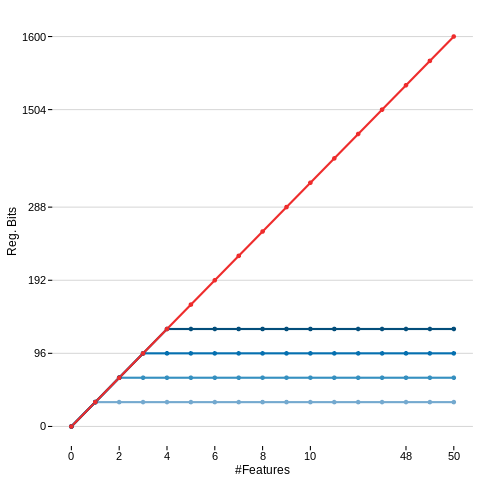

In [38]:
%%R -i reg_size_melt_df
reg_size_plot <- create_reg_size_plot(
    reg_size_melt_df, 
    # x_breaks=seq(from=0, to=16, length.out=9),
    x_breaks=c(0, 2, 4, 6, 8, 10, 14, 16),
    # y_breaks=seq(from=0, to=16, length.out=5),
    y_breaks=c(0, 3, 6, 9, 13, 16),
    y_limits=c(0, 16),
    x_labels=c("0", "2", "4", "6", "8", "10", "48", "50"),
    y_labels=c("0", "96", "192", "288", "1504", "1600"),
    legend_position=c(0.02, 1.08)
)

# 0, 3, 6, 9 multiplied by 32 in quotes
# c("0", "96", "192", "288")

reg_size_plot

In [39]:
%%R
ggsave(reg_size_plot, width=5.0, height=1.8, file="/home/jovyan/work/plots/generated/register-size.pdf")

## TCAM Entries vs F1 Score

In [40]:
bm_tcam_f1_path = "csv/bm-tcam-f1-score"

cic_iomt_2024_tcam_to_f1_df = pd.read_csv(os.path.join(bm_tcam_f1_path, "cic_iomt_2024_tcam_to_f1_df.csv"))
cic_iot_2023_tcam_to_f1_df = pd.read_csv(os.path.join(bm_tcam_f1_path, "cic_iot_2023_tcam_to_f1_df.csv"))
iscxvpn2016_tcam_to_f1_df = pd.read_csv(os.path.join(bm_tcam_f1_path, "iscxvpn2016_tcam_to_f1_df.csv"))
ucsbfinetuning_tcam_to_f1_df = pd.read_csv(os.path.join(bm_tcam_f1_path, "ucsbfinetuning_tcam_to_f1_df.csv"))
cic_iot_2023_32_tcam_to_f1_df = pd.read_csv(os.path.join(bm_tcam_f1_path, "cic_iot_2023_32_tcam_to_f1_df.csv"))
cic_ids_2017_tcam_to_f1_df = pd.read_csv(os.path.join(bm_tcam_f1_path, "cic_ids_2017_tcam_to_f1_df.csv"))
cic_ids_2018_tcam_to_f1_df = pd.read_csv(os.path.join(bm_tcam_f1_path, "cic_ids_2018_tcam_to_f1_df.csv"))

In [41]:
%%R
create_tcam_to_f1_score_plot <- function(
    tcam_to_f1_df, 
    line_size=1,
    point_size=2,
    x_label="#Entries", 
    y_label="F1 Score",
    y_title=element_blank(),
    tag, 
    # x_breaks=c(10^1, 10^2, 10^3, 10^4, 10^5),
    x_breaks=c(10^1, 10^3, 10^5, 10^7),
    x_limits=c(10^1, 10^7),
    y_breaks,
    y_limits,
    legend_position="none"
    ) {

    blues = brewer.pal(n = 9, "Blues")[5:9]
    reds = brewer.pal(n = 9, "Reds")[4:8]

    pareto_color_palette <- c(reds[4], reds[1], blues[3])
    new_legend_labels <- c("NB", "Leo", "SpliDT")

    # Reorder 'name' column to order netbeacon -> leo -> cap
    tcam_to_f1_df$name <- factor(tcam_to_f1_df$name, levels = c("netbeacon", "leo", "cap"))

    tcam_to_f1_plot <- ggplot(tcam_to_f1_df, aes(x=tcam_entries, y=f1_score, color=name)) +
                              geom_line(size=line_size) +
                              geom_point(
                                #   data = tcam_to_f1_df[seq(1, nrow(tcam_to_f1_df), by = 10), ],
                                  size=point_size
                                ) +
                              labs(x = x_label, y = y_label, tag = tag) +
                              scale_y_continuous(breaks=y_breaks, labels = scales::number_format(accuracy = 0.01)) +
                              scale_x_continuous(
                                   trans = "log10", 
                                   limits = x_limits, 
                                   # breaks = scales::trans_breaks("log10", function(x) 10^x),
                                   # breaks = 10^seq(0, 10, length.out = 6), # Generates 5 evenly spaced log10 breaks
                                   breaks = x_breaks, # Custom breaks at 10^3, 10^6, 10^9
                                   labels = scales::trans_format("log10", scales::math_format(10^.x))
                              ) +                              
                              coord_cartesian(ylim = y_limits, xlim = x_limits) +
                              theme_hc(base_size = 22) +
                              theme(axis.ticks = element_line(color = "black"), # Ensure ticks are visible
                                    axis.ticks.length = unit(0.15, "cm"), # Adjust the length of the ticks as needed
                                    plot.title = element_text(hjust = 0.5),
                                    axis.text.x=element_text(colour="black", size=16),
                                    axis.text.y=element_text(colour="black", size=16),
                                    axis.title.x=element_text(colour="black", size=18),
                                    axis.title.y=y_title,
                                    legend.text=element_text(size=16),
                                    plot.tag=element_text(colour="black", size=18, angle=0,
                                                          margin=margin(t=-10, r=0, b=0, l=0, unit="pt"),
                                                          vjust=2.0),
                                    plot.tag.position = "top") +
                              guides(fill=guide_legend(ncol=1, bycol=TRUE, title=NULL), linetype=FALSE) +
                              theme(plot.margin = margin(0.6, 0.25, 0.1, 0.25, "cm"),
                                    legend.margin = margin(t = -10.5, r = 0, b = 0, l = 0, unit = "pt"),
                                    legend.key.width = unit(0.4, "lines"),
                                    legend.key.height = unit(0.4, "lines"),
                                    legend.spacing.x = unit(0.05, "cm"),
                                    legend.spacing.y = unit(0.05, "cm"),
                                    legend.title = element_blank(), 
                                    legend.position = legend_position, 
                                    legend.justification = c(0, 1)) +
                              scale_color_manual(values = pareto_color_palette, labels = new_legend_labels)
                                
    return (tcam_to_f1_plot)
}

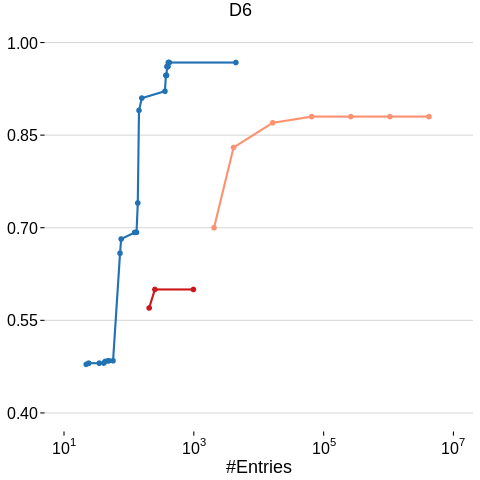

In [42]:
%%R -i cic_ids_2017_tcam_to_f1_df
cic_ids_2017_tcam_to_f1_plot <- create_tcam_to_f1_score_plot(
    cic_ids_2017_tcam_to_f1_df, 
    tag="D6",
    y_breaks=seq(from=0.4, to=1.0, length.out=5),
    y_limits=c(0.4, 1.0)
)

cic_ids_2017_tcam_to_f1_plot

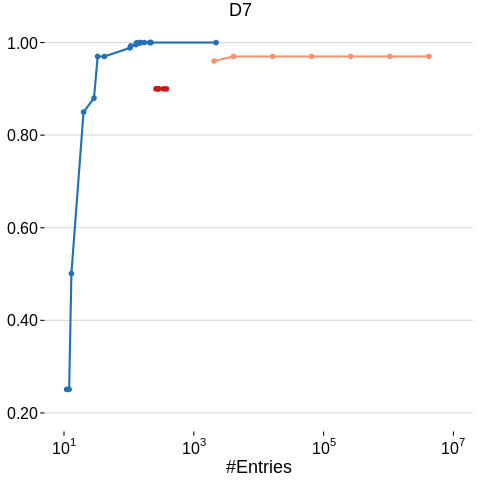

In [43]:
%%R -i cic_ids_2018_tcam_to_f1_df
cic_ids_2018_tcam_to_f1_plot <- create_tcam_to_f1_score_plot(
    cic_ids_2018_tcam_to_f1_df, 
    tag="D7",
    y_breaks=seq(from=0.20, to=1.0, length.out=5),
    y_limits=c(0.20, 1.0)
)

cic_ids_2018_tcam_to_f1_plot

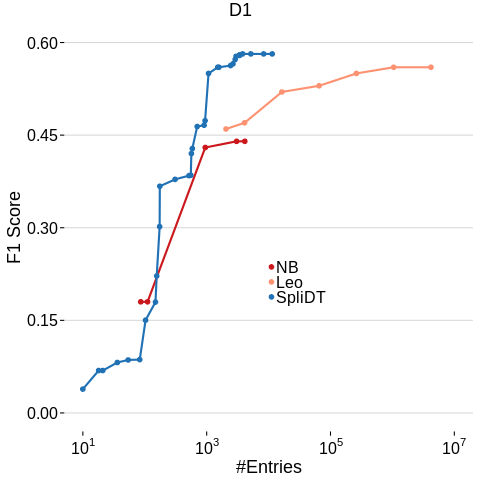

In [44]:
%%R -i cic_iomt_2024_tcam_to_f1_df
cic_iomt_2024_tcam_to_f1_plot <- create_tcam_to_f1_score_plot(
    cic_iomt_2024_tcam_to_f1_df, 
    tag="D1",
    y_title=element_text(colour="black", size=18),
    y_breaks=seq(from=0.0, to=0.6, length.out=5),
    y_limits=c(0.0, 0.6),
    legend_position=c(0.50, 0.40),
)

cic_iomt_2024_tcam_to_f1_plot

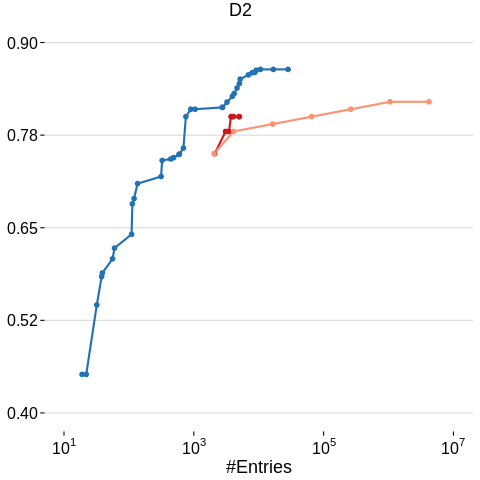

In [45]:
%%R -i cic_iot_2023_tcam_to_f1_df
cic_iot_2023_tcam_to_f1_plot <- create_tcam_to_f1_score_plot(
    cic_iot_2023_tcam_to_f1_df, 
    tag="D2",
    y_breaks=seq(from=0.4, to=0.9, length.out=5),
    y_limits=c(0.4, 0.9)
)

cic_iot_2023_tcam_to_f1_plot

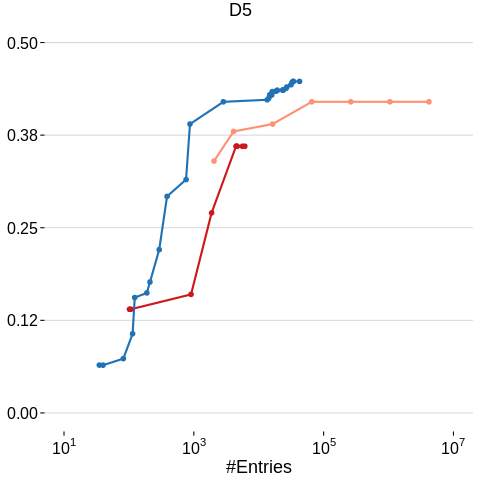

In [46]:
%%R -i cic_iot_2023_32_tcam_to_f1_df
cic_iot_2023_32_tcam_to_f1_plot <- create_tcam_to_f1_score_plot(
    cic_iot_2023_32_tcam_to_f1_df, 
    tag="D5",
    y_breaks=seq(from=0.0, to=0.5, length.out=5),
    y_limits=c(0.0, 0.5)
)

cic_iot_2023_32_tcam_to_f1_plot

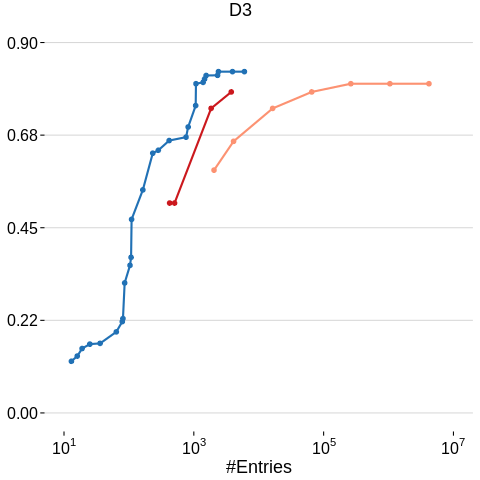

In [47]:
%%R -i iscxvpn2016_tcam_to_f1_df
iscxvpn2016_tcam_to_f1_plot <- create_tcam_to_f1_score_plot(
    iscxvpn2016_tcam_to_f1_df, 
    tag="D3",
    y_breaks=seq(from=0.0, to=0.9, length.out=5),
    y_limits=c(0.0, 0.9)
)

iscxvpn2016_tcam_to_f1_plot

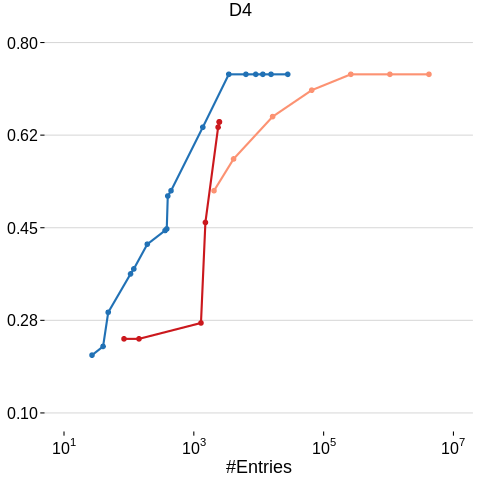

In [48]:
%%R -i ucsbfinetuning_tcam_to_f1_df
ucsbfinetuning_tcam_to_f1_plot <- create_tcam_to_f1_score_plot(
    ucsbfinetuning_tcam_to_f1_df, 
    tag="D4",
    y_breaks=seq(from=0.1, to=0.8, length.out=5),
    y_limits=c(0.1, 0.8)
)

ucsbfinetuning_tcam_to_f1_plot

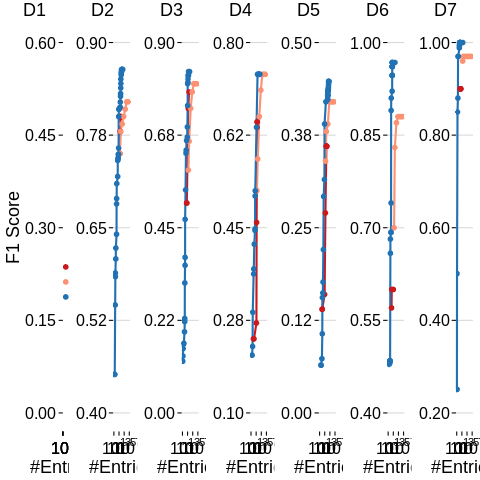

In [49]:
%%R
# save the ggplot with a tight layout around all the components
bm_combined_tcam_to_f1_plot <- grid.arrange(
    cic_iomt_2024_tcam_to_f1_plot,
    cic_iot_2023_tcam_to_f1_plot,
    iscxvpn2016_tcam_to_f1_plot,
    ucsbfinetuning_tcam_to_f1_plot,
    cic_iot_2023_32_tcam_to_f1_plot,
    cic_ids_2017_tcam_to_f1_plot,
    cic_ids_2018_tcam_to_f1_plot,
    nrow=1
)
ggsave(
    bm_combined_tcam_to_f1_plot, 
    width=17.8, height=2.5, # 18.0, 2.5
    file="/home/jovyan/work/plots/generated/bm-tcam-to-f1-score.pdf"
)

## Time-to-Detection (TTD)

In [50]:
bm_ttd_path = "csv/bm-time-to-detection"

iscxvpn2016_dc1_ttd = pd.read_csv(os.path.join(bm_ttd_path, "dc1_ttd.csv"))
iscxvpn2016_dc2_ttd = pd.read_csv(os.path.join(bm_ttd_path, "dc2_ttd.csv"))

iscxvpn2016_dc2_ttd

,name,ttd,cdf
0,netbeacon,0.00,0.000000
1,netbeacon,0.00,0.001001
2,netbeacon,0.00,0.002002
3,netbeacon,0.00,0.003003
4,netbeacon,0.00,0.004004
...,...,...,...
2995,cap,183932.36,0.995996
2996,cap,184650.17,0.996997
2997,cap,189600.28,0.997998
2998,cap,193452.41,0.998999


In [92]:
%%R
create_ttd_cdf_plot <- function(
    ttd_df, 
    line_size=1,
    point_size=1.2,
    x_label="Time-to-Detection (ms)", 
    y_label="ECDF",
    y_title=element_text(colour="black", size=18),
    x_title=element_blank(),
    tag, 
    x_breaks=c(10^0, 10^2, 10^4, 10^6),
    x_limits=c(0.1, 10^6),
    y_breaks,
    y_limits,
    legend_position="none"
    ) {

    blues = brewer.pal(n = 9, "Blues")[5:9]
    reds = brewer.pal(n = 9, "Reds")[4:8]

    pareto_color_palette <- c(reds[4], reds[1], blues[3])
    new_legend_labels <- c("NetBeacon (F1 = 0.78)", "Leo (F1 = 0.73)", "SpliDT (F1 = 0.85)")

    # Reorder 'name' column to order netbeacon -> leo -> cap
    ttd_df$name <- factor(ttd_df$name, levels = c("netbeacon", "leo", "cap"))

    ttd_plot <- ggplot(ttd_df, aes(x=ttd, y=cdf, color=name)) +
                       geom_line(size=line_size) +
                    #    geom_point(size=point_size) +
                       labs(x = x_label, y = y_label, tag = tag) +
                       scale_y_continuous(
                           breaks=y_breaks, labels = scales::number_format(accuracy = 0.01)
                        ) +
                       scale_x_continuous(
                            trans = "log10", 
                            limits = x_limits, 
                            breaks = x_breaks, # Custom breaks at 10^3, 10^6, 10^9
                            labels = scales::trans_format("log10", scales::math_format(10^.x))
                       ) +                              
                       coord_cartesian(ylim = y_limits, xlim = x_limits) +
                       theme_hc(base_size = 22) +
                       theme(axis.ticks = element_line(color = "black"), # Ensure ticks are visible
                             axis.ticks.length = unit(0.15, "cm"), # Adjust the length of the ticks as needed
                             plot.title = element_text(hjust = 0.5),
                             axis.text.x=element_text(colour="black", size=16),
                             axis.text.y=element_text(colour="black", size=16),
                             axis.title.x=x_title,
                             axis.title.y=y_title,
                             legend.text=element_text(size=16),
                             plot.tag=element_text(
                                 colour="black", size=22, angle=0,
                                #  margin=margin(t=-10, r=0, b=0, l=0, unit="pt"),
                                 vjust=0.0 # 2.0
                             ),
                             plot.tag.position = "bottom") +
                       guides(fill=guide_legend(ncol=1, bycol=TRUE, title=NULL), linetype=FALSE) +
                       theme(plot.margin = margin(0.6, 0.25, 0.15, 0.25, "cm"),
                             legend.margin = margin(t = -10.5, r = 0, b = 0, l = 0, unit = "pt"),
                             legend.key.width = unit(0.4, "lines"),
                             legend.key.height = unit(0.4, "lines"),
                             legend.spacing.x = unit(0.05, "cm"),
                             legend.spacing.y = unit(0.05, "cm"),
                             legend.title = element_blank(), 
                             legend.position = legend_position, 
                             legend.justification = c(0, 1)) +
                       scale_color_manual(values = pareto_color_palette, labels = new_legend_labels)
                                
    return (ttd_plot)
}

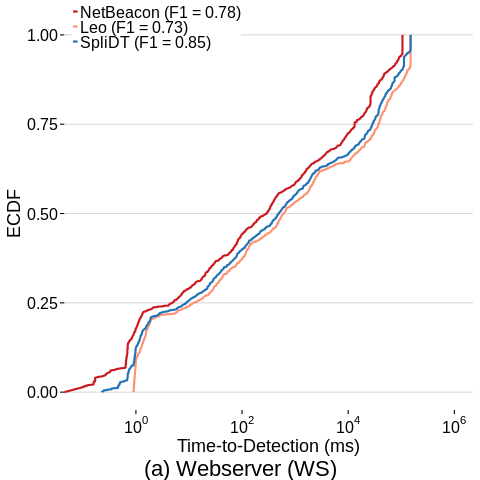

In [105]:
%%R -i iscxvpn2016_dc1_ttd
iscxvpn2016_dc1_ttd_plot <- create_ttd_cdf_plot(
    iscxvpn2016_dc1_ttd, 
    x_title=element_text(colour="black", size=18),
    tag="(a) Webserver (WS)", # High Concurrency/Long-Lived Flows
    y_breaks=seq(from=0.0, to=1.0, length.out=5),
    y_limits=c(0.0, 1.0),
    legend_position=c(0.02, 1.01)
)

iscxvpn2016_dc1_ttd_plot

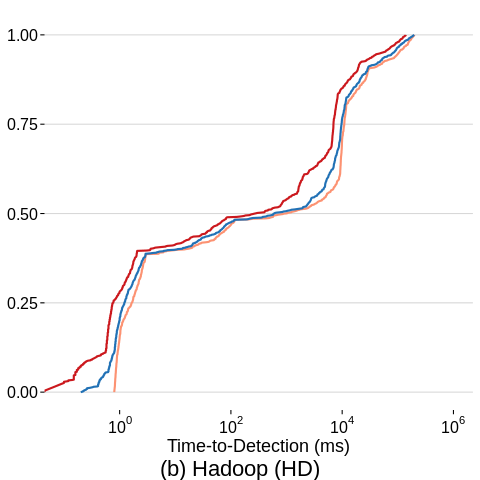

In [106]:
%%R -i iscxvpn2016_dc2_ttd
iscxvpn2016_dc2_ttd_plot <- create_ttd_cdf_plot(
    iscxvpn2016_dc2_ttd, 
    y_title=element_blank(),
    x_title=element_text(colour="black", size=18),
    tag="(b) Hadoop (HD)", # Bursty/Short-Lived Flows
    y_breaks=seq(from=0.0, to=1.0, length.out=5),
    y_limits=c(0.0, 1.0)
)

iscxvpn2016_dc2_ttd_plot

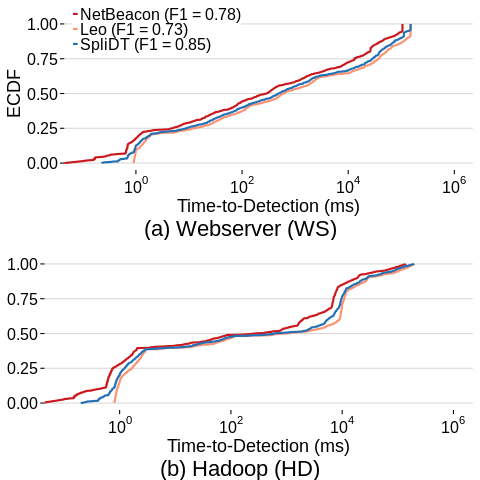

In [107]:
%%R
# save the ggplot with a tight layout around all the components
bm_combined_ttd_plot <- grid.arrange(
    iscxvpn2016_dc1_ttd_plot,
    iscxvpn2016_dc2_ttd_plot,
    ncol=1
)
ggsave(bm_combined_ttd_plot, width=9.0, height=5.0, file="/home/jovyan/work/plots/generated/bm-ttd-cdf.pdf")

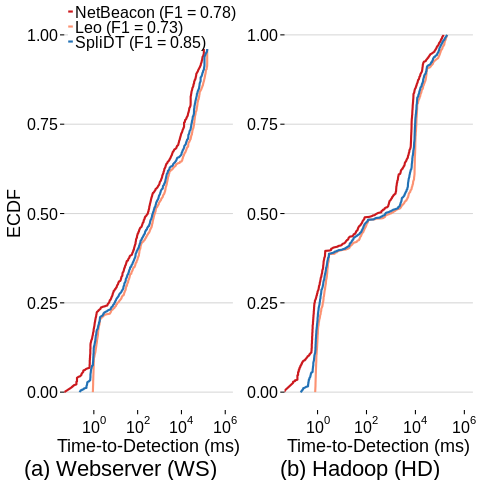

In [108]:
%%R
# save the ggplot with a tight layout around all the components
bm_combined_ttd_plot <- grid.arrange(
    iscxvpn2016_dc1_ttd_plot,
    iscxvpn2016_dc2_ttd_plot,
    nrow=1
)
ggsave(
    bm_combined_ttd_plot, 
    width=9.0, height=2.8, 
    file="/home/jovyan/work/plots/generated/bm-ttd-cdf-2.pdf"
)

## Bit-Precision vs F1 Score

In [56]:
%%R
create_pareto_plot <- function(
    pareto_df, 
    line_size=1,
    point_size=2,
    x_label="#Flows", 
    y_label="F1 Score",
    y_title=element_blank(),
    tag, 
    # x_breaks=seq(from=0, to=1000000, length.out=4),
    x_breaks=c(0, 100000, 500000, 1000000),
    y_breaks,
    y_limits,
    legend_position="none"
    ) {

    blues = brewer.pal(n = 9, "Blues")[5:9]
    reds = brewer.pal(n = 9, "Reds")[4:8]

    pareto_color_palette <- c(reds[4], reds[1], blues[3])
    new_legend_labels <- c("NB", "Leo", "SpliDT")

    # Reorder 'name' column to order netbeacon -> leo -> cap
    pareto_df$name <- factor(pareto_df$name, levels = c("netbeacon", "leo", "cap"))

    pareto_plot <- ggplot(pareto_df, aes(x=num_flows, y=f1_score, color=name)) +
                          geom_line(size=line_size) +
                          geom_point(size=point_size) +
                          labs(x = x_label, y = y_label, tag = tag) +
                          scale_x_continuous(breaks=x_breaks, labels = label_number_si()) +
                          scale_y_continuous(breaks=y_breaks, labels = scales::number_format(accuracy = 0.01)) +
                          coord_cartesian(ylim = y_limits) +
                          theme_hc(base_size = 22) +
                          theme(axis.ticks = element_line(color = "black"), # Ensure ticks are visible
                                axis.ticks.length = unit(0.15, "cm"), # Adjust the length of the ticks as needed
                                plot.title = element_text(hjust = 0.5),
                                axis.text.x=element_text(colour="black", size=16),
                                axis.text.y=element_text(colour="black", size=16),
                                axis.title.x=element_text(colour="black", size=18),
                                axis.title.y=y_title,
                                legend.text=element_text(size=16),
                                plot.tag=element_text(colour="black", size=18, angle=0,
                                                      margin=margin(t=-10, r=0, b=0, l=0, unit="pt"),
                                                      vjust=2.0),
                                plot.tag.position = "top") +
                          guides(fill=guide_legend(ncol=1, bycol=TRUE, title=NULL), linetype=FALSE) +
                          theme(plot.margin = margin(0.6, 0.25, 0.1, 0.25, "cm"),
                                legend.margin = margin(t = -10.5, r = 0, b = 0, l = 0, unit = "pt"),
                                legend.key.width = unit(0.4, "lines"),
                                legend.key.height = unit(0.4, "lines"),
                                legend.spacing.x = unit(0.05, "cm"),
                                legend.spacing.y = unit(0.05, "cm"),
                                legend.title = element_blank(), 
                                legend.position = legend_position, 
                                legend.justification = c(0, 1)) +
                          scale_color_manual(values = pareto_color_palette, labels = new_legend_labels)
                                
    return (pareto_plot)
}

### 8-bit precision

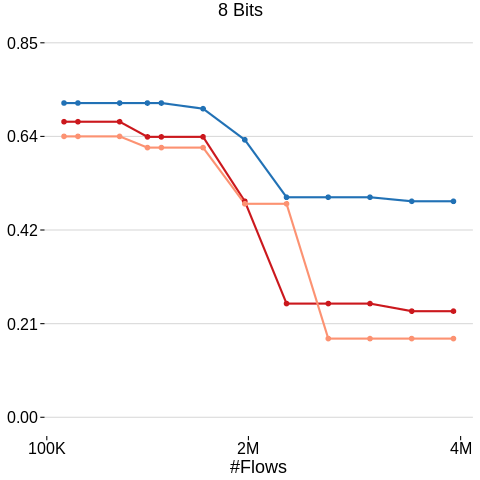

In [57]:
%%R -i pareto_iscxvpn2016_df

# create a copy of the dataframe
pareto_iscxvpn2016_8bit_df <- pareto_iscxvpn2016_df
# multiply number of flows by 4
pareto_iscxvpn2016_8bit_df <- pareto_iscxvpn2016_8bit_df %>% 
    mutate(num_flows = num_flows * 4)

# NetBeacon: reduce F1 score by 14%
pareto_iscxvpn2016_8bit_df <- pareto_iscxvpn2016_8bit_df %>% 
    mutate(f1_score = if_else(name == 'netbeacon', f1_score * 0.86, f1_score))
# Leo: reduce F1 score by 15%
pareto_iscxvpn2016_8bit_df <- pareto_iscxvpn2016_8bit_df %>% 
    mutate(f1_score = if_else(name == 'leo', f1_score * 0.85, f1_score))
# CaP: reduce F1 score by 14%
pareto_iscxvpn2016_8bit_df <- pareto_iscxvpn2016_8bit_df %>% 
    mutate(f1_score = if_else(name == 'cap', f1_score * 0.86, f1_score))

bm_8bit_pareto_iscxvpn2016_plot <- create_pareto_plot(
    pareto_df=pareto_iscxvpn2016_8bit_df, 
    tag="8 Bits", 
    x_breaks=c(100000, 2000000, 4000000),
    y_breaks=seq(from=0.0, to=0.85, length.out=5),
    y_limits=c(0.0, 0.85)
)
bm_8bit_pareto_iscxvpn2016_plot

### 16-bit precision

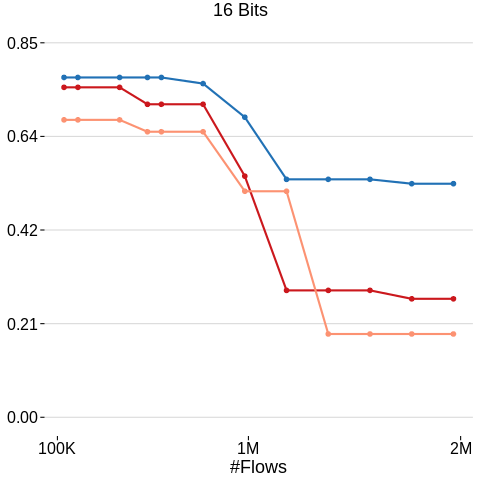

In [58]:
%%R -i pareto_iscxvpn2016_df

# create a copy of the dataframe
pareto_iscxvpn2016_16bit_df <- pareto_iscxvpn2016_df
# multiply number of flows by 2
pareto_iscxvpn2016_16bit_df <- pareto_iscxvpn2016_16bit_df %>% 
    mutate(num_flows = num_flows * 2)

# NetBeacon: reduce F1 score by 4%
pareto_iscxvpn2016_16bit_df <- pareto_iscxvpn2016_16bit_df %>% 
    mutate(f1_score = if_else(name == 'netbeacon', f1_score * 0.96, f1_score))
# Leo: reduce F1 score by 10%
pareto_iscxvpn2016_16bit_df <- pareto_iscxvpn2016_16bit_df %>% 
    mutate(f1_score = if_else(name == 'leo', f1_score * 0.90, f1_score))
# CaP: reduce F1 score by 7%
pareto_iscxvpn2016_16bit_df <- pareto_iscxvpn2016_16bit_df %>% 
    mutate(f1_score = if_else(name == 'cap', f1_score * 0.93, f1_score))

bm_16bit_pareto_iscxvpn2016_plot <- create_pareto_plot(
    pareto_df=pareto_iscxvpn2016_16bit_df, 
    tag="16 Bits", 
    x_breaks=c(100000, 1000000, 2000000),
    y_breaks=seq(from=0.0, to=0.85, length.out=5),
    y_limits=c(0.0, 0.85)
)
bm_16bit_pareto_iscxvpn2016_plot

### 32-bit precision

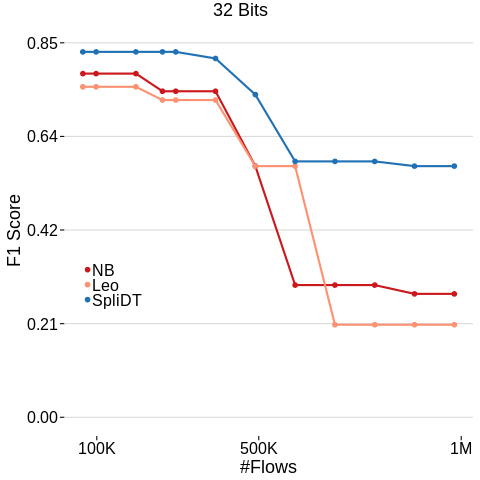

In [59]:
%%R -i pareto_iscxvpn2016_df

# create a copy of the dataframe
pareto_iscxvpn2016_32bit_df <- pareto_iscxvpn2016_df

bm_32bit_pareto_iscxvpn2016_plot <- create_pareto_plot(
    pareto_df=pareto_iscxvpn2016_32bit_df, 
    tag="32 Bits", 
    y_title=element_text(colour="black", size=18),
    y_breaks=seq(from=0.0, to=0.85, length.out=5),
    y_limits=c(0.0, 0.85),
    legend_position=c(0.05, 0.40)
)
bm_32bit_pareto_iscxvpn2016_plot

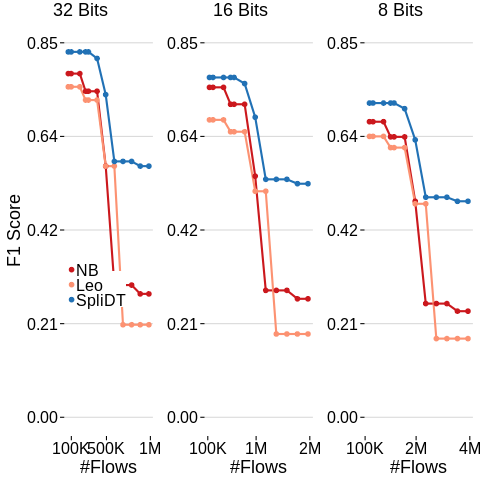

In [60]:
%%R
# save the ggplot with a tight layout around all the components
bm_bit_precision_plot <- grid.arrange(
    bm_32bit_pareto_iscxvpn2016_plot,
    bm_16bit_pareto_iscxvpn2016_plot,
    bm_8bit_pareto_iscxvpn2016_plot,
    nrow=1
)
ggsave(bm_bit_precision_plot, width=9.0, height=2.5, file="/home/jovyan/work/plots/generated/bm-bit-precision.pdf")

# Extra Plots

## TCAM Entries (calculated specifically for this experiment)

In [61]:
bm_tcam_depth_path = "csv/bm-tcam-depth"

cic_iomt_2024_tcam_df = pd.read_csv(os.path.join(bm_tcam_depth_path, "cic_iomt_2024_tcam_df.csv"))
cic_iot_2023_tcam_df = pd.read_csv(os.path.join(bm_tcam_depth_path, "cic_iot_2023_tcam_df.csv"))
iscxvpn2016_tcam_df = pd.read_csv(os.path.join(bm_tcam_depth_path, "iscxvpn2016_tcam_df.csv"))
ucsbfinetuning_tcam_df = pd.read_csv(os.path.join(bm_tcam_depth_path, "ucsbfinetuning_tcam_df.csv"))
cic_iot_2023_32_tcam_df = pd.read_csv(os.path.join(bm_tcam_depth_path, "cic_iot_2023_32_tcam_df.csv"))
cic_ids_2017_tcam_df = pd.read_csv(os.path.join(bm_tcam_depth_path, "cic_ids_2017_tcam_df.csv"))
cic_ids_2018_tcam_df = pd.read_csv(os.path.join(bm_tcam_depth_path, "cic_ids_2018_tcam_df.csv"))

In [62]:
%%R
create_tcam_plot <- function(
    tcam_df, 
    line_size=1,
    point_size=2,
    x_label="Depth", 
    y_label="#Entries",
    y_title=element_blank(),
    tag, 
    x_breaks=seq(from=0, to=30, length.out=5),
    # x_breaks=c(0, 100000, 500000, 1000000),
    # y_breaks,
    # y_limits,
    legend_position="none"
    ) {
        
    
    ########################################################################################
    ########################################################################################
    ## Hardcode the values for Leo
    
    leo_all_dataset_tcam_df <- data.frame(
        max_depth = 3:30,
        tcam_entries = c(
            2048, 2048, 2048, 2048, 2048, 2048, 4096, 8192, 16384, 32768, 
            65536, 131072, 262144, 524288, 1048576, 2097152, 4194304, 8388608,
            16777216, 33554432, 67108864, 134217728, 268435456, 536870912,
            1073741824, 2147483648, 4294967296, 8589934592
        ),
        name = rep("leo", 28)
    )

    # Row-wise concatenation
    combined_tcam_df <- rbind(tcam_df, leo_all_dataset_tcam_df)
    
    # filter specific values to plot
    combined_tcam_df <- combined_tcam_df[combined_tcam_df$max_depth %in% c(4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30), ]

    blues = brewer.pal(n = 9, "Blues")[5:9]
    reds = brewer.pal(n = 9, "Reds")[4:8]

    # Reorder 'name' column to order netbeacon -> leo -> cap
    bm_pareto_color_palette <- c(reds[4], reds[1], blues[3])
    
    new_legend_labels <- c('NB', 'Leo', 'SpliDT')
    
    combined_tcam_df$name <- factor(combined_tcam_df$name, levels = c("netbeacon", "leo", "cap"))

    tcam_plot <- ggplot(combined_tcam_df, aes(x=max_depth, y=tcam_entries, color=name)) +
                        geom_line(size=line_size) +
                        geom_point(size=point_size) +
                        labs(x = x_label, y = y_label, tag = tag) +
                        scale_x_continuous(
                            breaks=x_breaks, 
                            labels = label_number_si()
                        ) +
                        scale_y_continuous(
                            trans = "log10", 
                            # limits = c(1, 9e9), 
                            # breaks = scales::trans_breaks("log10", function(x) 10^x),
                            # breaks = 10^seq(0, 10, length.out = 6), # Generates 5 evenly spaced log10 breaks
                            breaks = c(10^1, 10^3, 10^5, 10^7, 10^9), # Custom breaks at 10^3, 10^6, 10^9
                            labels = scales::trans_format("log10", scales::math_format(10^.x))
                        ) +
                        coord_cartesian(ylim = c(10^1, 10^10)) +
                        theme_hc(base_size = 22) +
                        theme(axis.ticks = element_line(color = "black"), # Ensure ticks are visible
                              axis.ticks.length = unit(0.15, "cm"), # Adjust the length of the ticks as needed
                              plot.title = element_text(hjust = 0.5),
                              axis.text.x=element_text(colour="black", size=16),
                              axis.text.y=element_text(colour="black", size=16),
                              axis.title.x=element_text(colour="black", size=18),
                              axis.title.y=y_title,
                              legend.text=element_text(size=16),
                              plot.tag=element_text(colour="black", size=18, angle=0,
                                                    margin=margin(t=-10, r=0, b=0, l=0, unit="pt"),
                                                    vjust=2.0),
                              plot.tag.position = "top") +
                        guides(fill=guide_legend(ncol=1, bycol=TRUE, title=NULL), linetype=FALSE) +
                        theme(plot.margin = margin(0.6, 0.25, 0.1, 0.25, "cm"),
                              legend.margin = margin(t = -10.5, r = 0, b = 0, l = 0, unit = "pt"),
                              legend.key.width = unit(0.4, "lines"),
                              legend.key.height = unit(0.4, "lines"),
                              legend.spacing.x = unit(0.05, "cm"),
                              legend.spacing.y = unit(0.05, "cm"),
                              legend.title = element_blank(), 
                              legend.position = legend_position, 
                              legend.justification = c(0, 1)) + 
                        scale_color_manual(values = bm_pareto_color_palette, labels = new_legend_labels)
                                
    return (tcam_plot)
}

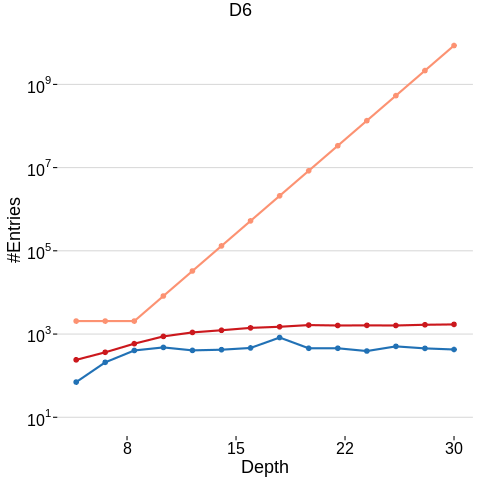

In [63]:
%%R -i cic_ids_2017_tcam_df

cic_ids_2017_tcam_plot <- create_tcam_plot(
    cic_ids_2017_tcam_df, 
    tag="D6",
    y_title=element_text(colour="black", size=18)
)

cic_ids_2017_tcam_plot

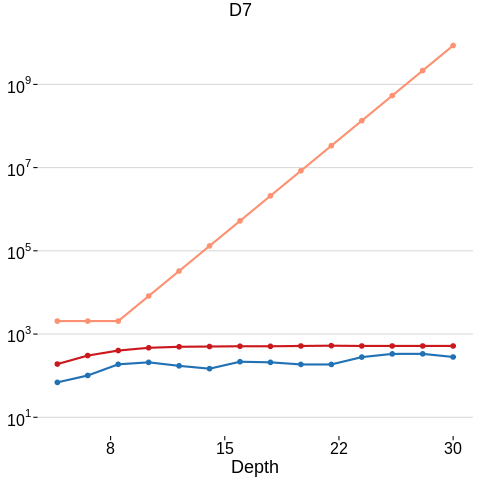

In [64]:
%%R -i cic_ids_2018_tcam_df
cic_ids_2018_tcam_plot <- create_tcam_plot(
    cic_ids_2018_tcam_df, 
    tag="D7"
)

cic_ids_2018_tcam_plot

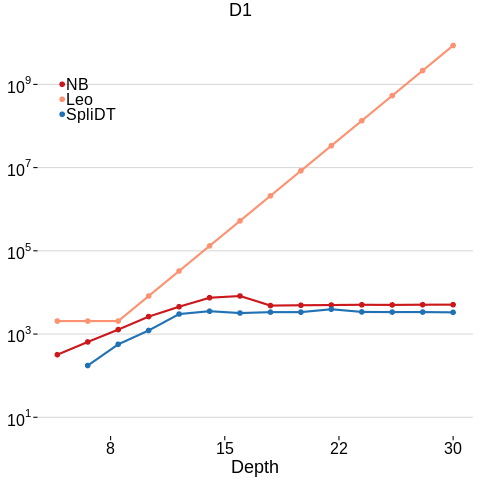

In [65]:
%%R -i cic_iomt_2024_tcam_df
cic_iomt_2024_tcam_plot <- create_tcam_plot(
    cic_iomt_2024_tcam_df, 
    tag="D1",
    legend_position=c(0.05, 0.85)
)

cic_iomt_2024_tcam_plot

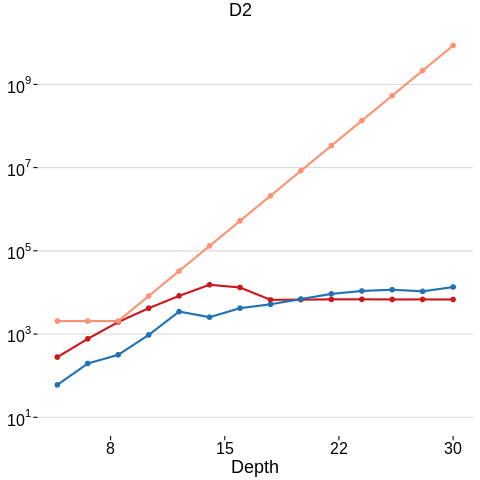

In [66]:
%%R -i cic_iot_2023_tcam_df
cic_iot_2023_tcam_plot <- create_tcam_plot(
    cic_iot_2023_tcam_df, 
    tag="D2"
)

cic_iot_2023_tcam_plot

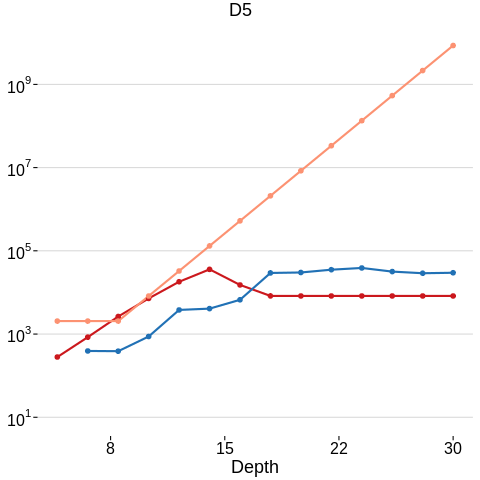

In [67]:
%%R -i cic_iot_2023_32_tcam_df
cic_iot_2023_32_tcam_plot <- create_tcam_plot(
    cic_iot_2023_32_tcam_df, 
    tag="D5"
)

cic_iot_2023_32_tcam_plot

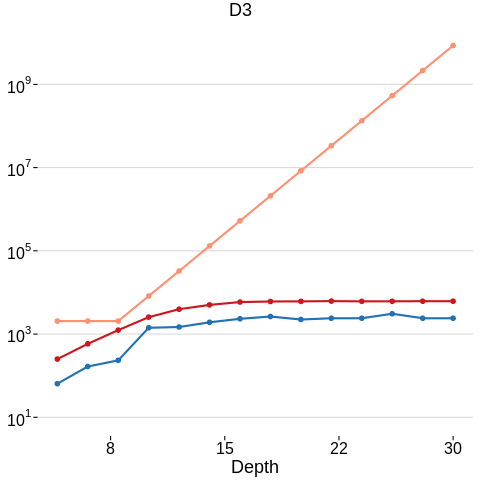

In [68]:
%%R -i iscxvpn2016_tcam_df
iscxvpn2016_tcam_plot <- create_tcam_plot(
    iscxvpn2016_tcam_df, 
    tag="D3"
)

iscxvpn2016_tcam_plot

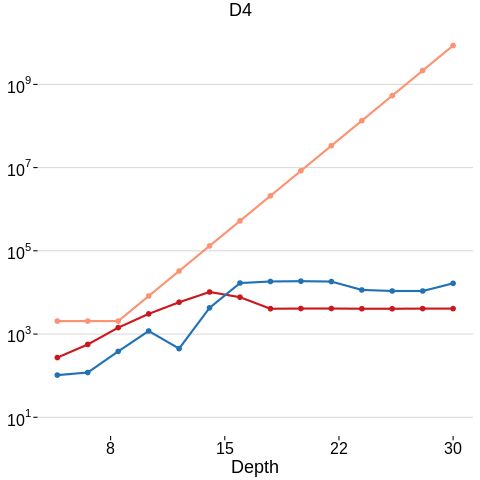

In [69]:
%%R -i ucsbfinetuning_tcam_df
ucsbfinetuning_tcam_plot <- create_tcam_plot(
    ucsbfinetuning_tcam_df, 
    tag="D4"
)

ucsbfinetuning_tcam_plot

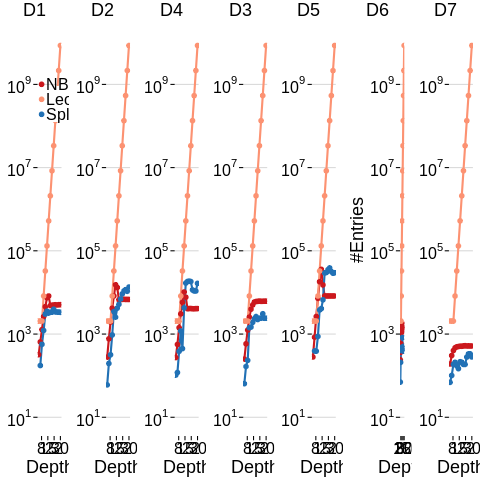

In [70]:
%%R
# save the ggplot with a tight layout around all the components
bm_combined_tcam_depth_plot <- grid.arrange(
    cic_iomt_2024_tcam_plot,
    cic_iot_2023_tcam_plot,
    ucsbfinetuning_tcam_plot,
    iscxvpn2016_tcam_plot,
    cic_iot_2023_32_tcam_plot,
    cic_ids_2017_tcam_plot,
    cic_ids_2018_tcam_plot,
    nrow=1
)
ggsave(bm_combined_tcam_depth_plot, width=18.0, height=2.5, file="/home/jovyan/work/plots/generated/old/bm-tcam-depth.pdf")

## Number of Partitions vs F1 Score

In [71]:
bm_partitions_backup_path = "csv/bm-partitions-backup"

cic_iomt_2024_partitions = pd.read_csv(os.path.join(bm_partitions_backup_path, "cic_iomt_2024_partitions.csv"))
cic_iot_2023_partitions = pd.read_csv(os.path.join(bm_partitions_backup_path, "cic_iot_2023_partitions.csv"))
iscxvpn2016_partitions = pd.read_csv(os.path.join(bm_partitions_backup_path, "iscxvpn2016_partitions.csv"))
ucsbfinetuning_partitions = pd.read_csv(os.path.join(bm_partitions_backup_path, "ucsbfinetuning_partitions.csv"))
cic_iot_2023_32_partitions = pd.read_csv(os.path.join(bm_partitions_backup_path, "cic_iot_2023_32_partitions.csv"))
cic_ids_2017_partitions = pd.read_csv(os.path.join(bm_partitions_backup_path, "cic_ids_2017_partitions.csv"))
cic_ids_2018_partitions = pd.read_csv(os.path.join(bm_partitions_backup_path, "cic_ids_2018_partitions.csv"))

In [72]:
%%R
create_partition_plot <- function(
    partition_df,
    metric, 
    line_size=1,
    point_size=2.5,
    x_label="#Partitions", 
    y_label="F1 Score",
    ylabel_labels=scales::number_format(accuracy = 0.01), # label_number_si()
    axis_title_x=element_text(colour="black", size=16),
    axis_title_y=element_blank(), #element_text(colour="black", size=16),
    tag, 
    x_breaks=c(1, 3, 5, 7),
    y_breaks,
    y_limits,
    legend_position="none"
    ) {

    blues = brewer.pal(n = 9, "Blues")[5:9]
    reds = brewer.pal(n = 9, "Reds")[4:8]

    partition_plot <- ggplot(partition_df, aes_string(x="num_partitions", y=metric, color="dataset")) +
                            geom_line(size=line_size) +
                            geom_point(size=point_size) +
                            labs(x = x_label, y = y_label) +
                            scale_x_continuous(breaks=x_breaks) +
                            scale_y_continuous(breaks=y_breaks, labels = ylabel_labels) +
                            scale_color_manual(values = c(blues[3])) +
                            coord_cartesian(ylim = y_limits) +
                            theme_hc(base_size = 22) +
                            theme(axis.ticks = element_line(color = "black"), # Ensure ticks are visible
                                axis.ticks.length = unit(0.15, "cm"), # Adjust the length of the ticks as needed
                                plot.title = element_text(hjust = 0.5),
                                axis.text.x=element_text(colour="black", size=14),
                                axis.text.y=element_text(colour="black", size=14),
                                axis.title.x=axis_title_x,
                                axis.title.y=axis_title_y,
                                legend.text=element_text(size=14),
                                plot.tag=element_text(colour="black", size=15, angle=-90,
                                                    margin=margin(t=-10, r=0, b=0, l=0, unit="pt"),
                                                    vjust=2.0),
                                plot.tag.position = "right") +
                            guides(color=guide_legend(ncol=1, byrow=TRUE, title=NULL), linetype=FALSE) +
                            theme(legend.margin = margin(t = -10.5, r = 0, b = 0, l = 0, unit = "pt"),
                                legend.key.width = unit(0.5, "lines"),
                                legend.key.height = unit(0.5, "lines"),
                                legend.spacing.x = unit(0.05, "cm"),
                                legend.spacing.y = unit(0.05, "cm"),
                                legend.title = element_blank(), 
                                legend.position = legend_position, 
                                legend.justification = c(0, 1))
                         
    return (partition_plot)
}

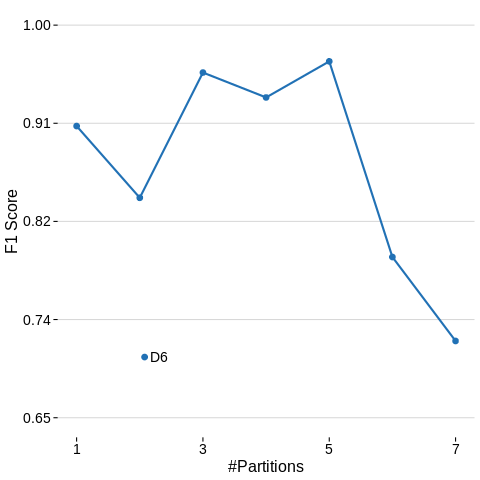

In [73]:
%%R -i cic_ids_2017_partitions
cic_ids_2017_partitions_plot <- create_partition_plot(
    partition_df=cic_ids_2017_partitions, 
    metric="f1_score",
    axis_title_y=element_text(colour="black", size=16),
    tag="D6", 
    y_breaks=seq(from=0.65, to=1.0, length.out=5),
    y_limits=c(0.65, 1.0),
    legend_position=c(0.20, 0.18)
)
cic_ids_2017_partitions_plot

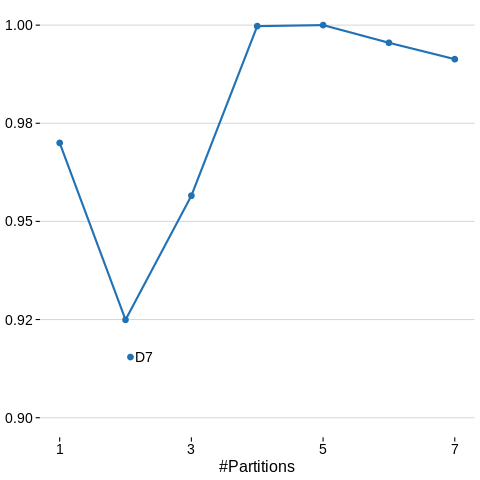

In [74]:
%%R -i cic_ids_2018_partitions
cic_ids_2018_partitions_plot <- create_partition_plot(
    partition_df=cic_ids_2018_partitions, 
    metric="f1_score",
    tag="D7", 
    y_breaks=seq(from=0.90, to=1.0, length.out=5),
    y_limits=c(0.90, 1.0),
    legend_position=c(0.20, 0.18)
)
cic_ids_2018_partitions_plot

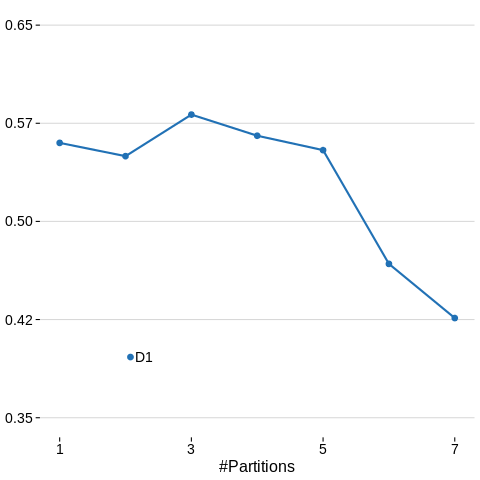

In [75]:
%%R -i cic_iomt_2024_partitions
cic_iomt_2024_partitions_plot <- create_partition_plot(
    partition_df=cic_iomt_2024_partitions, 
    metric="f1_score",
    tag="D1", 
    y_breaks=seq(from=0.35, to=0.65, length.out=5),
    y_limits=c(0.35, 0.65),
    legend_position=c(0.20, 0.18)
)
cic_iomt_2024_partitions_plot

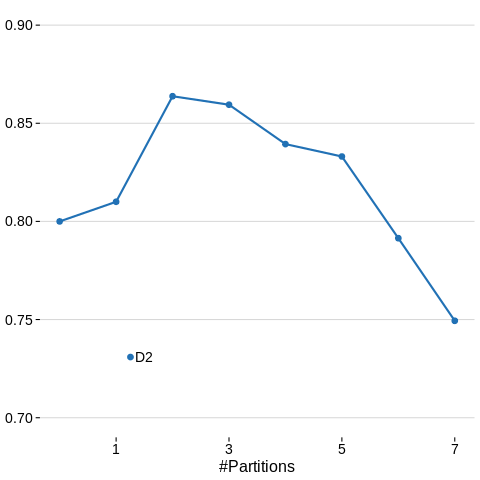

In [76]:
%%R -i cic_iot_2023_partitions
cic_iot_2023_partitions_plot <- create_partition_plot(
    partition_df=cic_iot_2023_partitions, 
    metric="f1_score",
    tag="D2", 
    y_breaks=seq(from=0.7, to=0.9, length.out=5),
    y_limits=c(0.7, 0.9),
    legend_position=c(0.20, 0.18)
)
cic_iot_2023_partitions_plot

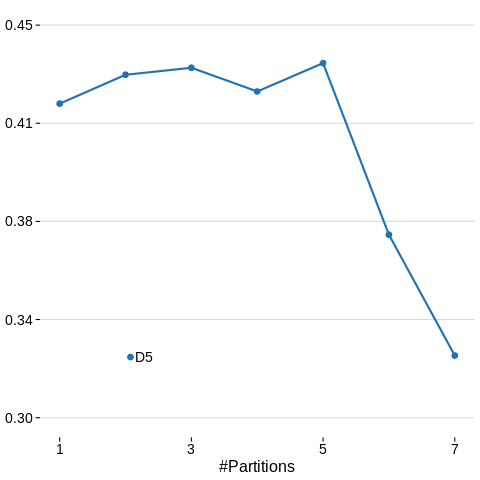

In [77]:
%%R -i cic_iot_2023_32_partitions
cic_iot_2023_32_partitions_plot <- create_partition_plot(
    partition_df=cic_iot_2023_32_partitions, 
    metric="f1_score",
    tag="D5", 
    y_breaks=seq(from=0.3, to=0.45, length.out=5),
    y_limits=c(0.3, 0.45),
    legend_position=c(0.20, 0.18)
)
cic_iot_2023_32_partitions_plot

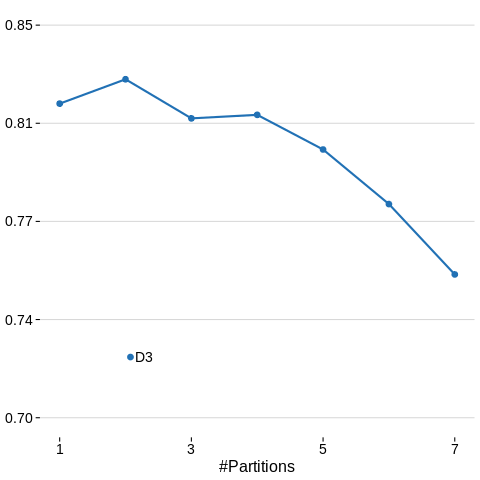

In [78]:
%%R -i iscxvpn2016_partitions
iscxvpn2016_partitions_plot <- create_partition_plot(
    partition_df=iscxvpn2016_partitions, 
    metric="f1_score",
    tag="D3", 
    y_breaks=seq(from=0.7, to=0.85, length.out=5),
    y_limits=c(0.7, 0.85),
    legend_position=c(0.20, 0.18)
)
iscxvpn2016_partitions_plot

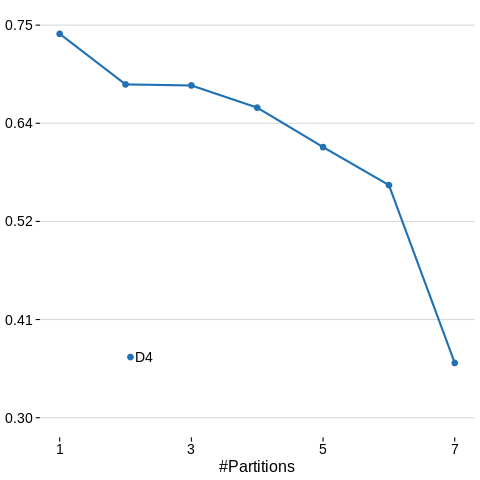

In [79]:
%%R -i ucsbfinetuning_partitions
ucsbfinetuning_partitions_plot <- create_partition_plot(
    partition_df=ucsbfinetuning_partitions, 
    metric="f1_score",
    tag="D4", 
    y_breaks=seq(from=0.30, to=0.75, length.out=5),
    y_limits=c(0.30, 0.75),
    legend_position=c(0.20, 0.18)
)
ucsbfinetuning_partitions_plot

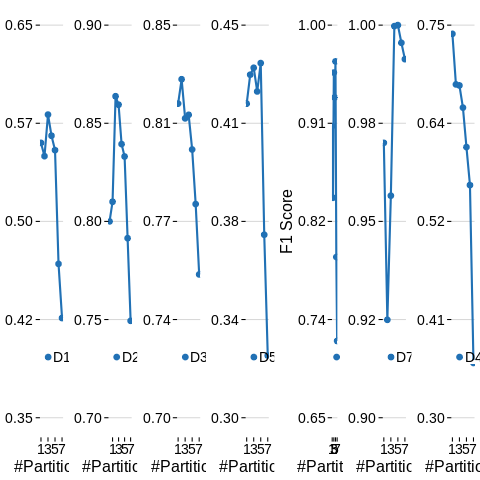

In [80]:
%%R
# save the ggplot with a tight layout around all the components
combined_partition_plots <- grid.arrange(
    cic_iomt_2024_partitions_plot,
    cic_iot_2023_partitions_plot,
    iscxvpn2016_partitions_plot,
    cic_iot_2023_32_partitions_plot,
    cic_ids_2017_partitions_plot,
    cic_ids_2018_partitions_plot,
    ucsbfinetuning_partitions_plot,
    nrow=1
)
ggsave(combined_partition_plots, width=18.0, height=2.0, file="/home/jovyan/work/plots/generated/old/partitions-vs-f1.pdf")

In [81]:
# bm_partitions_backup_path = "csv/bm-partitions-backup"

cic_iomt_2024_flows_partitions = pd.read_csv(os.path.join(bm_partitions_backup_path, "cic_iomt_2024_flows_partitions.csv"))
cic_iot_2023_flows_partitions = pd.read_csv(os.path.join(bm_partitions_backup_path, "cic_iot_2023_flows_partitions.csv"))
iscxvpn2016_flows_partitions = pd.read_csv(os.path.join(bm_partitions_backup_path, "iscxvpn2016_flows_partitions.csv"))
ucsbfinetuning_flows_partitions = pd.read_csv(os.path.join(bm_partitions_backup_path, "ucsbfinetuning_flows_partitions.csv"))
cic_iot_2023_32_flows_partitions = pd.read_csv(os.path.join(bm_partitions_backup_path, "cic_iot_2023_32_flows_partitions.csv"))
cic_ids_2017_flows_partitions = pd.read_csv(os.path.join(bm_partitions_backup_path, "cic_ids_2017_flows_partitions.csv"))
cic_ids_2018_flows_partitions = pd.read_csv(os.path.join(bm_partitions_backup_path, "cic_ids_2018_flows_partitions.csv"))

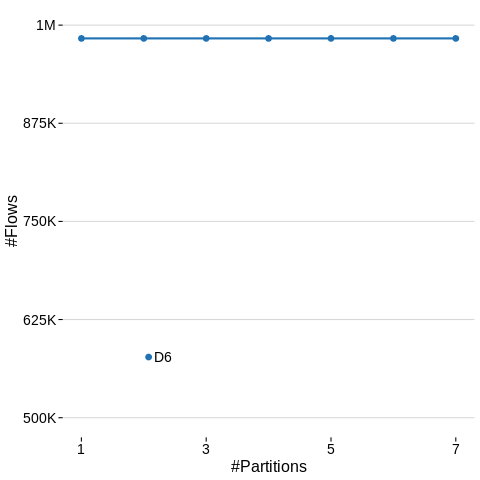

In [82]:
%%R -i cic_ids_2017_flows_partitions
cic_ids_2017_partitions_flows_plot <- create_partition_plot(
    partition_df=cic_ids_2017_flows_partitions, 
    axis_title_y=element_text(colour="black", size=16),
    y_label="#Flows",
    ylabel_label=label_number_si(),
    metric="num_flows",
    tag="D6", 
    y_breaks=seq(from=500000, to=1000000, length.out=5),
    y_limits=c(500000, 1000000),
    legend_position=c(0.20, 0.18)
)
cic_ids_2017_partitions_flows_plot

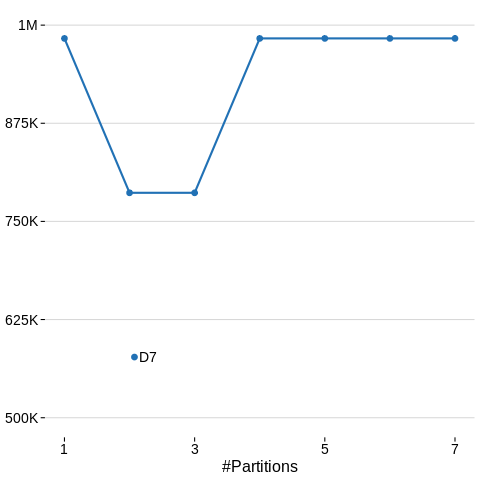

In [83]:
%%R -i cic_ids_2018_flows_partitions
cic_ids_2018_partitions_flows_plot <- create_partition_plot(
    partition_df=cic_ids_2018_flows_partitions, 
    ylabel_label=label_number_si(),
    metric="num_flows",
    tag="D7", 
    y_breaks=seq(from=500000, to=1000000, length.out=5),
    y_limits=c(500000, 1000000),
    legend_position=c(0.20, 0.18)
)
cic_ids_2018_partitions_flows_plot

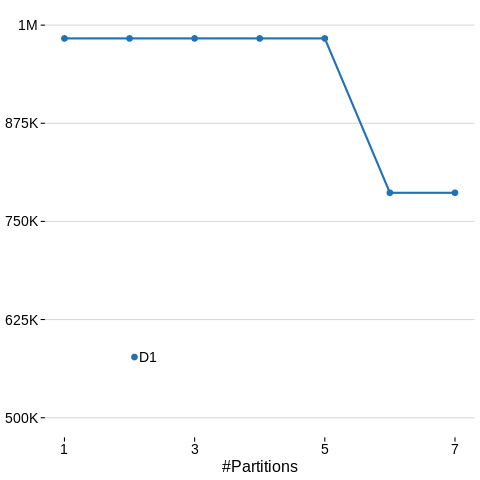

In [84]:
%%R -i cic_iomt_2024_flows_partitions
cic_iomt_2024_partitions_flows_plot <- create_partition_plot(
    partition_df=cic_iomt_2024_flows_partitions, 
    ylabel_label=label_number_si(),
    metric="num_flows",
    tag="D1", 
    y_breaks=seq(from=500000, to=1000000, length.out=5),
    y_limits=c(500000, 1000000),
    legend_position=c(0.20, 0.18)
)
cic_iomt_2024_partitions_flows_plot

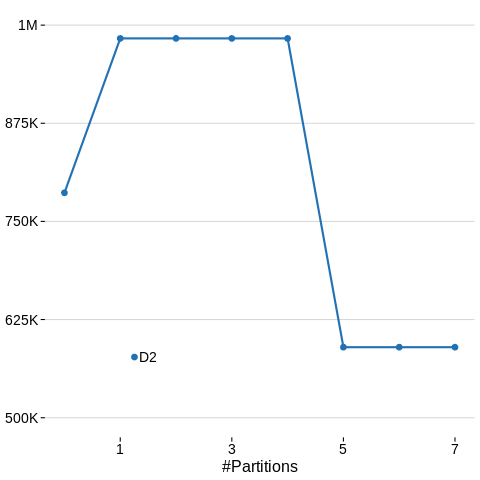

In [85]:
%%R -i cic_iot_2023_flows_partitions
cic_iot_2023_partitions_flows_plot <- create_partition_plot(
    partition_df=cic_iot_2023_flows_partitions, 
    ylabel_label=label_number_si(),
    metric="num_flows",
    tag="D2", 
    y_breaks=seq(from=500000, to=1000000, length.out=5),
    y_limits=c(500000, 1000000),
    legend_position=c(0.20, 0.18)
)
cic_iot_2023_partitions_flows_plot

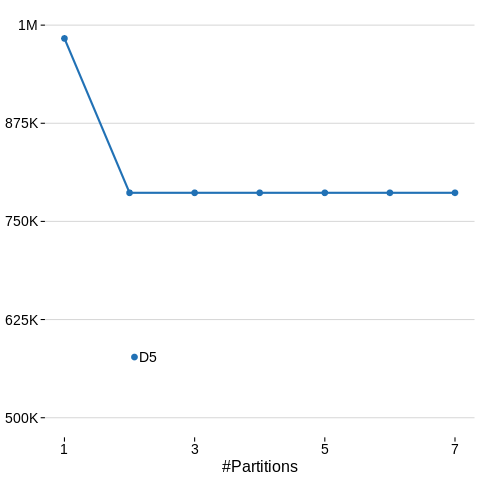

In [86]:
%%R -i cic_iot_2023_32_flows_partitions
cic_iot_2023_32_partitions_flows_plot <- create_partition_plot(
    partition_df=cic_iot_2023_32_flows_partitions, 
    ylabel_label=label_number_si(),
    metric="num_flows",
    tag="D5", 
    y_breaks=seq(from=500000, to=1000000, length.out=5),
    y_limits=c(500000, 1000000),
    legend_position=c(0.20, 0.18)
)
cic_iot_2023_32_partitions_flows_plot

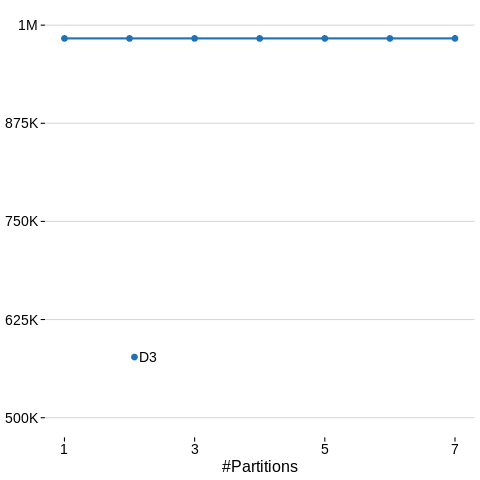

In [87]:
%%R -i iscxvpn2016_flows_partitions
iscxvpn2016_partitions_flows_plot <- create_partition_plot(
    partition_df=iscxvpn2016_flows_partitions, 
    ylabel_label=label_number_si(),
    metric="num_flows",
    tag="D3", 
    y_breaks=seq(from=500000, to=1000000, length.out=5),
    y_limits=c(500000, 1000000),
    legend_position=c(0.20, 0.18)
)
iscxvpn2016_partitions_flows_plot

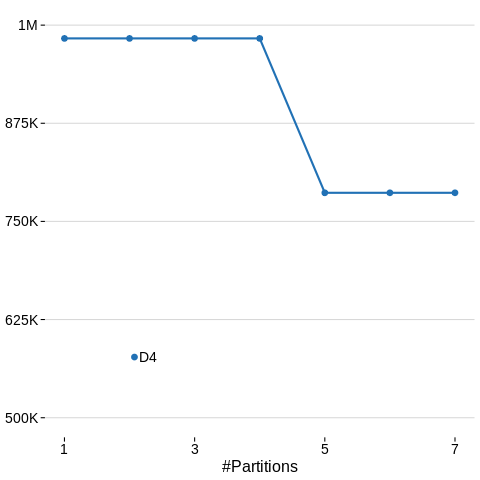

In [88]:
%%R -i ucsbfinetuning_flows_partitions
ucsbfinetuning_partitions_flows_plot <- create_partition_plot(
    partition_df=ucsbfinetuning_flows_partitions, 
    ylabel_label=label_number_si(),
    metric="num_flows",
    tag="D4", 
    y_breaks=seq(from=500000, to=1000000, length.out=5),
    y_limits=c(500000, 1000000),
    legend_position=c(0.20, 0.18)
)
ucsbfinetuning_partitions_flows_plot

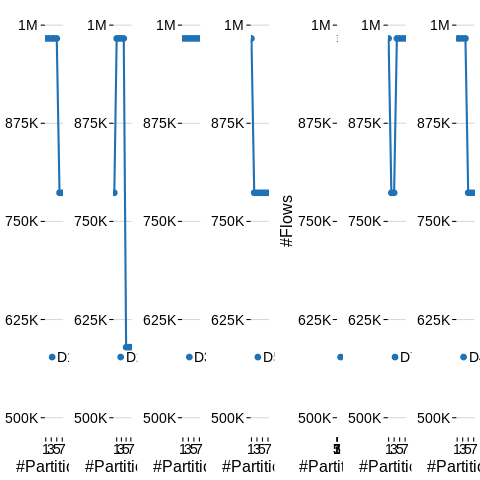

In [89]:
%%R
# save the ggplot with a tight layout around all the components
combined_partition_flows_plots <- grid.arrange(
    cic_iomt_2024_partitions_flows_plot,
    cic_iot_2023_partitions_flows_plot,
    iscxvpn2016_partitions_flows_plot,
    cic_iot_2023_32_partitions_flows_plot,
    cic_ids_2017_partitions_flows_plot,
    cic_ids_2018_partitions_flows_plot,
    ucsbfinetuning_partitions_flows_plot,
    nrow=1
)
ggsave(combined_partition_flows_plots, width=18.0, height=2.0, file="/home/jovyan/work/plots/generated/old/partitions-vs-flows.pdf")